<a href="https://colab.research.google.com/github/fmassini/DataScienceCoderhouse/blob/main/Obtencion_Insights_Visualizaciones_Massini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - Abstract

Link presentación ejecutiva:

https://www.canva.com/design/DAFunxBYZVA/T_8mOwGeap-Ib5fWWcb-tQ/edit?utm_content=DAFunxBYZVA&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

##1.1 - Contexto y problema comercial

La empresa Bosch es conocida por fabricar productos diversos para todo el mundo. Recientemente comenzó a producir un nuevo producto, el cual cuenta con 5 versiones distintas.

Este producto tiene la característica de producirse de una manera diferente a lo que la empresa está acostumbrada, por ello se han desarrollado nuevos procedimientos para llevar adelante la producción.

Estos procedimientos al ser nuevos, lamentablemente distan bastante del ideal; hace falta mucho estudio y trabajo para volverlos más eficientes.

De ahí nace la necesidad de este estudio, con la información que nos proporciona el desarrollador del producto, el sector logístico deberá buscar la manera de optimizar sus procesos, para poder cumplir con los plazos de abastecimiento a planta.

De ninguna manera puede suceder que la línea productiva pare por falta de piezas a la hora de montar, logística debe hacer lo indispensable para evitar este panorama. Y a su vez, hacerlo de la manera más eficiente posible (en cuanto a tiempos y costos).

##1.2 - Contexto analítico y objetivo

El siguiente dataset contiene información sobre las piezas con su respectivo código (referencia) necesarias para construir distintas versiones de un producto en específico. Estas versiones difieren ya que algunas son más completas que otras, o tienen diferentes funciones, y por ende llevan distintas piezas en su ensamblado.

La mercadería viene en cajones llamados "bases" dentro de contenedores. A su vez, cada caja dentro de estas bases tiene dentro un número determinado de piezas (indicado en el dataset). En resumen, las piezas vienen en cajas, las cuales vienen en bases, las cuales a su vez vienen en contenedores. Toda esta información está detallada en el dataset, donde se indica incluso dimensiones, pesos y tipo de packaging de las bases o cajas.

Cada fila además aclara a que versión del producto pertenece la pieza, hay piezas comunes a todos y otras que no lo son. Una vez traidos los contenedores, las piezas deberán separarse en clases. La clase de una pieza determina de qué forma se ensambla, por lo que es necesario clasificar todo antes de comenzar a ensamblar el producto.

Algunos puntos interesantes a ver en este estudio:

1. Como se distribuyen las referencias entre las clases? Hay alguna que contenga más variedad?
2. Para contar con el total de piezas de una referencia, cuantas cajas se deben abrir aproximadamente?
3. Las bases, cuantas cajas traen? Y referencias? Cómo viene la mercadería distribuída?
4. Cada referencia, en cuantas versiones se usa? Hay muchas comunes a todas?
5. Qué clase conlleva más volumen?
6. Cuáles versiones son más parecidas/diferentes entre si?

Por otro lado, en determinadas ocasiones sucede que logística tiene rotura de piezas, las cuales es necesario reponer. Para esto, se hacen solicitudes al proveedor de envíos puntuales, con la mercadería específica que se necesita.

Esta mercadería puede venir en diferentes tipos de packaging, el cual determina las condiciones de almacenamiento a posteriori. De ahí, se abren otros puntos interesantes a analizar:

7. En el caso de que logística necesite pedir un envío especial de piezas a reponer, es posible predecir en qué tipo de packaging lo enviará el proveedor?
8. Qué variables son importantes a la hora de predecir dicho packaging?
9. Es posible deducir qué lógica usa el proveedor para seleccionarlo?
10. Cuantos días demora un envío? Qué tanto varía según cuál sea el país de destino?
11. Qué variable es más importante a la hora de calcular el costo del envío? El peso? El volumen? Otra?
12. Cual sea la variable de la respuesta anterior, también afecta los días que demora un envío en llegar?

Todos estos puntos indudablemente ayudan a optimizar el proceso de ingreso de la mercadería, tanto para lo que es inspección como para almacenamiento y traslado. Es crítico que todas las piezas se encuentren en el lugar correcto a la hora de producir, y lo que buscamos es volver más eficiente el camino a dicho objetivo.

Fuente: https://docs.google.com/spreadsheets/d/1azdrQsFjjf_YaMbhLYAZjTZPEhPa-n3E/edit?usp=sharing&ouid=111044325679429769254&rtpof=true&sd=true

#2 - Data acquisition

##2.1 - Importando librerías y realizando conexiones

In [ ]:
!git clone https://github.com/tctianchi/pyvenn.git
%cd pyvenn
!pip install venn
import venn #Importo librería especializada para generar diagramas de Venn de más de 3 sets (límite de Matplotlib)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from matplotlib.patches import Circle
import requests
from scipy import stats

##2.2 - Conociendo las variables del DS

###2.2.1 - Diccionario de columnas del DS

In [ ]:
DSNX_IND=pd.read_excel('DS producto.xlsx',sheet_name='Hoja2')
DSNX_IND.head(17)

COLUMNA                                        DESCRIPCIÓN  \
0         CLASE           Sector en el cual se ensambla esta pieza   
1       VERSION  Versión del producto al cual pertenece esta pieza   
2    CONTENEDOR             Contenedor en el cual viene esta pieza   
3          BASE                   Base en la cual viene esta pieza   
4     TIPO BASE                                       Tipo de base   
5    LARGO BASE                             Largo de la base en mm   
6    ANCHO BASE                             Ancho de la base en mm   
7   ALTURA BASE                            Altura de la base en mm   
8     PESO BASE                              Peso de la base en kg   
9          CAJA                   Caja en la cual viene esta pieza   
10    TIPO CAJA                                       Tipo de caja   
11   LARGO CAJA                             Largo de la caja en mm   
12   ANCHO CAJA                             Ancho de la caja en mm   
13  ALTURA CAJA                            Altura de la caja en mm   
14    PESO CAJA                              Peso de la caja en kg   
15   REFERENCIA                               Código de esta pieza   
16    UNID/CAJA        Cantidad de esta pieza que viene en la caja   

       EJEMPLO 1     EJEMPLO 2  
0             F1             A  
1            M42           A42  
2    CMAU4908460   MRSU3285393  
3         AF0001         MP001  
4     IRON FRAME    IRON FRAME  
5           2110          2250  
6            600          1700  
7           1200          1050  
8            205         861.0  
9         AF0001        MC0072  
10    IRON FRAME        CARTON  
11          1700           800  
12           100           500  
13           130           530  
14        153.92         13.85  
15  2804110-BU01  6900006P201D  
16            16            16

###2.2.2 - Diagrama final resumiendo toda la operativa

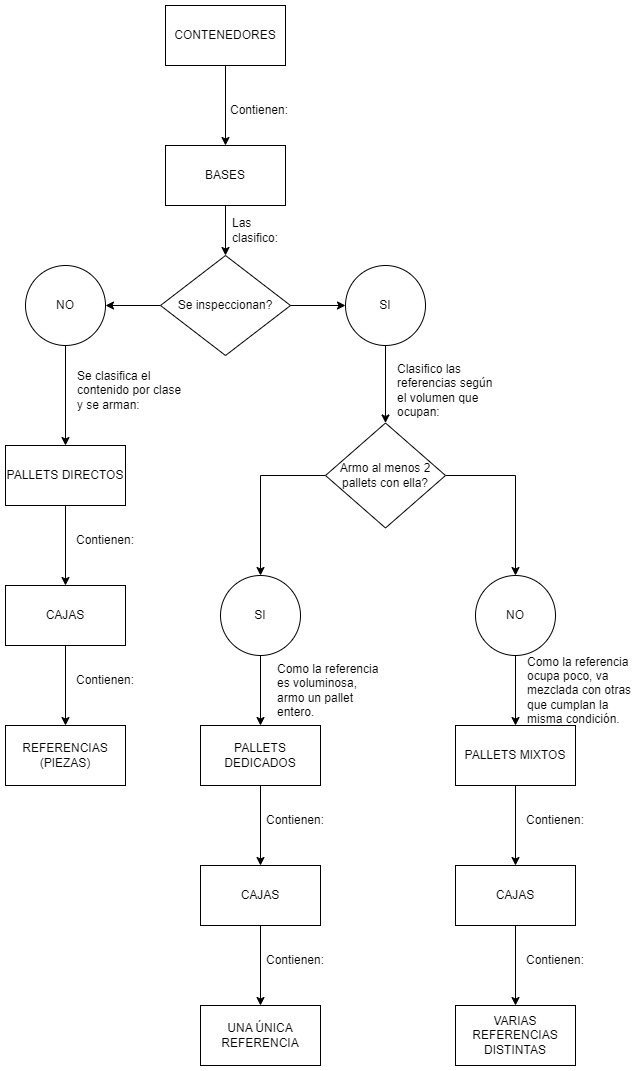

In [ ]:
imagen = Image.open('Flujo.jpg')
display(imagen)

#3 - Data wrangling

##3.1 - Generación de columnas nuevas para estudiar las bases

In [ ]:
DSNX=pd.read_excel('DS producto.xlsx',sheet_name='Hoja1') #Cargo DS

In [ ]:
DSNX['CAJAS/BASE'] = DSNX.groupby(['BASE', 'VERSION'])['BASE'].transform('count') #Genero la columna CAJAS/BASE

In [ ]:
DSNX['REFS/BASE'] = DSNX.groupby(['BASE', 'VERSION'])['REFERENCIA'].transform('nunique') #Genero la columna REFS(distintas)/BASE

In [ ]:
DSNX['CLASES/BASE'] = DSNX.groupby(['BASE', 'VERSION'])['CLASE'].transform('nunique') #Genero la columna CLASES/BASE

Como se explicaba en la introducción, para comenzar a producir es necesario clasificar las piezas en clases. Para esto se debe inspeccionar la mercadería que ingresa, aunque no es necesario hacerlo para todas las bases.

Si las referencias que vienen en la base, pertenecen a distintas clases, se deberá inspeccionar y clasificar, de lo contrario no hará falta, y la base se abatecerá directamente a la clase correspondiente.

In [ ]:
DSNX['INSPECCIÓN'] = np.where(DSNX['CLASES/BASE']>1, 1, 0) #Si la base tiene referencias pertenecientes a más de una clase, la inspecciono

##3.2 - Generación de columnas nuevas para estudiar las cajas

In [ ]:
DSNX['REFS/CAJA'] = DSNX.groupby(['CAJA', 'VERSION'])['REFERENCIA'].transform('nunique') #Genero la columna REFS(distintas)/CAJA

In [ ]:
DSNX['VOLUMEN CAJA'] = ((DSNX['LARGO CAJA']/1000) * (DSNX['ANCHO CAJA']/1000) * (DSNX['ALTURA CAJA']/1000))/DSNX['REFS/CAJA'] #Genero la columna que indique cuanto volumen ocupa la referencia de la fila en cuestión. Si la caja trae múltiples referencias, divido entre esa cantidad

In [ ]:
DSNX['VOL TOTAL'] = DSNX.groupby(['VERSION','INSPECCIÓN','REFERENCIA'])['VOLUMEN CAJA'].transform('sum') #La idea aquí es calcular cuanto volumen en total ocuparía cada referencia, por versión. Separamos según si la base es inspeccionable o no, ya que la pieza recorre un camino distinto en cada caso

Ahora que conocemos el volumen que ocupa cada referencia, podemos calcular a cuantos pallets equivaldría dentro de una clase.

Recordemos que tenemos 2 tipos de bases, las inspeccionables y las que no.
Las inspeccionables se deberán revisar y armar pallets con la mercadería que contienen.

Lo más fácil para abastecer, es llevar pallets que contengan una sola referencia, ya que los que poseen muchas tienen el problema de que el operario debe "revolver" el pallet para encontrar una referencia en específico.
Por ello, lo ideal sería que cada pallet contenga cajas de una única referencia. El problema está en que no siempre el volumen justifica hacer esto, por ello algunas referencias podrán ir en pallets monoproducto (dedicados) y otras deberán ir en multiproducto (mixtos).

Tomaremos como criterio que armaremos pallets dedicados (una sola ref.) solamente de aquellas referencias que junten en volumen más de 2 pallets completos. El resto irá en pallets mixtos.

En cuanto a las bases no inspeccionables, se abastecen directamente, por ello les llamaremos "DIRECTOS".

A continuación, realizamos estos cálculos y obtenemos el DS final para trabajar.

In [ ]:
VOL_PALLET = 1.2*1.0*1.4 #Volumen que ocupa un pallet completo
DSNX['TIPO PALLET'] = np.where(DSNX['VOL TOTAL']>(2*VOL_PALLET), 'DEDICADO', 'MIXTO') #Si, por versión, una referencia junta más de 2 pallets en una clase, voy a armar pallets monoproducto (dedicados) de esa referencia, de lo contrario irá en pallets mezclados (mixtos)
DSNX['TIPO PALLET'] = np.where(DSNX['INSPECCIÓN']==0, 'DIRECTO', DSNX['TIPO PALLET']) #Esto anterior aplica solo a lo inspeccionable, lo otro se considera "directo"
#DSNX.to_excel('EXTRAIDO.xlsx', index=False)
DSNX

CLASE VERSION    CONTENEDOR    BASE   TIPO BASE  LARGO BASE  ANCHO BASE  \
0        F1     M42   CMAU4908460  AF0001  IRON FRAME        2110         600   
1        F1     M42   CMAU4908460  AF0002  IRON FRAME        2110         600   
2        F1     M42   CMAU4908460  AF0003  IRON FRAME        2110         600   
3        F1     M42   CMAU4908460  AF0004  IRON FRAME        2110         600   
4        F1     M42   CMAU4908460  AF0005  IRON FRAME        2110         600   
...     ...     ...           ...     ...         ...         ...         ...   
23096     G     A42   TEMU8886138   HF030  IRON FRAME        2110         600   
23097     G     A42   TEMU8886138   HF030  IRON FRAME        2110         600   
23098     G     A42   TEMU8886138   HF030  IRON FRAME        2110         600   
23099     G     A42   TEMU8886138   HF030  IRON FRAME        2110         600   
23100     G     A42   TEMU8886138   HF030  IRON FRAME        2110         600   

       ALTURA BASE  PESO BASE    CAJA  ...       REFERENCIA  UNID/CAJA  \
0             1200      205.0  AF0001  ...     2804110-BU01         16   
1             1200      205.0  AF0002  ...     2804110-BU01         16   
2             1200      205.0  AF0003  ...     2804110-BU01         16   
3             1200      205.0  AF0004  ...     2804110-BU01         16   
4             1200      205.0  AF0005  ...     2804110-BU01         16   
...            ...        ...     ...  ...              ...        ...   
23096         1200      286.0  HC0012  ...  3101010-BU51-AA          1   
23097         1200      286.0  HC0013  ...  3101010-BU51-AA          1   
23098         1200      286.0  HC0014  ...  3101010-BU51-AA          1   
23099         1200      286.0  HC0015  ...  3101010-BU51-AA          1   
23100         1200      286.0  HC0016  ...  3101010-BU51-AA          1   

       CAJAS/BASE  REFS/BASE  CLASES/BASE INSPECCIÓN  REFS/CAJA  VOLUMEN CAJA  \
0               1          1            1          0          1        0.0221   
1               1          1            1          0          1        0.0221   
2               1          1            1          0          1        0.0221   
3               1          1            1          0          1        0.0221   
4               1          1            1          0          1        0.0221   
...           ...        ...          ...        ...        ...           ...   
23096          16          1            1          0          1        0.0625   
23097          16          1            1          0          1        0.0625   
23098          16          1            1          0          1        0.0625   
23099          16          1            1          0          1        0.0625   
23100          16          1            1          0          1        0.0625   

       VOL TOTAL  TIPO PALLET  
0         0.1326      DIRECTO  
1         0.1326      DIRECTO  
2         0.1326      DIRECTO  
3         0.1326      DIRECTO  
4         0.1326      DIRECTO  
...          ...          ...  
23096    30.0000      DIRECTO  
23097    30.0000      DIRECTO  
23098    30.0000      DIRECTO  
23099    30.0000      DIRECTO  
23100    30.0000      DIRECTO  

[23101 rows x 25 columns]

#4 - Exploratory data analysis

##4.1 - Visualizaciones

###4.1.1 - Graficamos cuantas referencias distintas pertenecen a cada clase, promediando por versión

A continuación el análisis, un pequeño glosario y el gráfico.

In [ ]:
DSNX_1 = DSNX.groupby(['CLASE', 'VERSION'])['REFERENCIA'].nunique().unstack() #Quiero saber cuantas referencias distintas hay en cada clase, por versión
DSNX_1['PROMEDIO'] =  DSNX_1.mean(axis=1, skipna=True) #Calculo el promedio por versión
DSNX_1

VERSION  A41  A42  M21  M41  M42  PROMEDIO
CLASE                                     
A         10   10   10   10   10      10.0
CA1       25   33   25   25   33      28.2
CA2       33   33   37   39   39      36.2
CA3       39   37   39   39   37      38.2
CA4       44   45   44   44   45      44.4
CA5       16   16   16   16   16      16.0
CA6       29   31   29   29   31      29.8
CA7       20   22   20   20   22      20.8
CH1       15   15   14   15   15      14.8
CH2       33   33   31   33   33      32.6
CH3       14   13   11   11   11      12.0
CH4        7    7    7    7    7       7.0
CH6        8    8    7    8    8       7.8
E         15   15   15   15   15      15.0
F1        15   15   15   15   15      15.0
F2        26   25   26   26   25      25.6
F3        34   42   35   35   42      37.6
F4         8   13    8    8   13      10.0
F5         9    9    9    9    9       9.0
F6        11   11   11   11   11      11.0
G          3    3    3    3    3       3.0
M         27   27   18   19   19      22.0
PI         8    8    8    8    8       8.0
PL        30   20   30   30   20      26.0
S         41   41   42   42   42      41.6
SP         9    9    9    9    9       9.0
TA        32   34   31   31   34      32.4
TO       193  191  192  193  191     192.0

In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='REFERENCIA') | (DSNX_IND['COLUMNA']=='CLASE') | (DSNX_IND['COLUMNA']=='VERSION')]

COLUMNA                                        DESCRIPCIÓN  \
0        CLASE           Sector en el cual se ensambla esta pieza   
1      VERSION  Versión del producto al cual pertenece esta pieza   
15  REFERENCIA                               Código de esta pieza   

       EJEMPLO 1     EJEMPLO 2  
0             F1             A  
1            M42           A42  
15  2804110-BU01  6900006P201D

Text(0.5, 1.0, 'REFERENCIAS DISTINTAS INVOLUCRADAS POR CLASE (PROMEDIO POR VERSIÓN)')

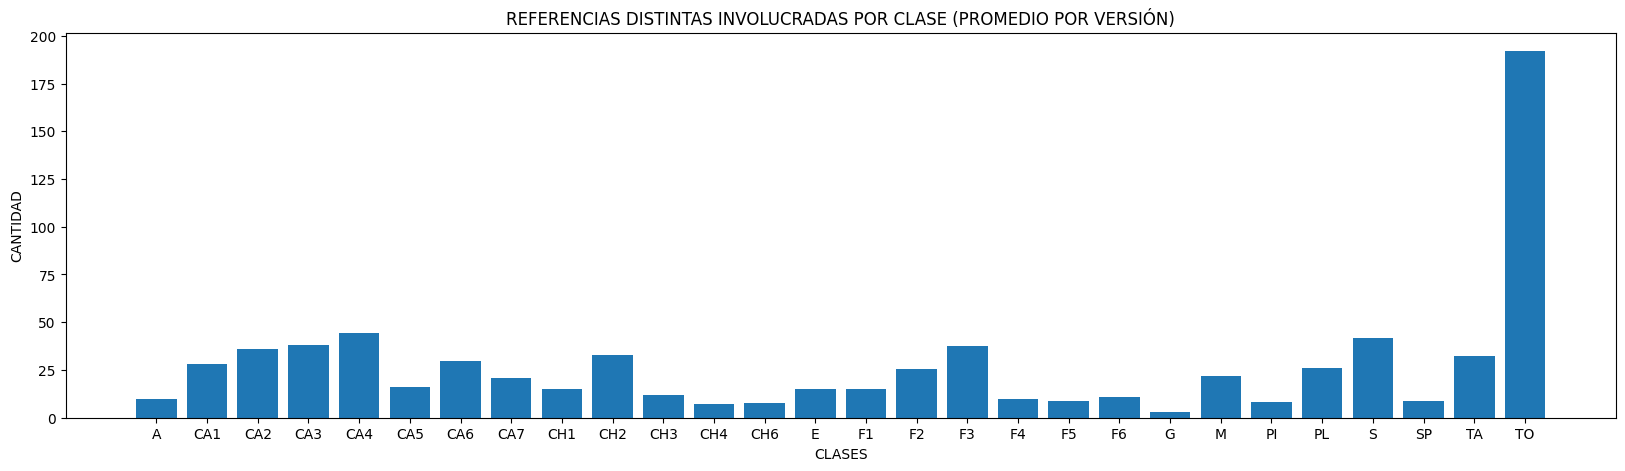

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(DSNX_1.index,DSNX_1['PROMEDIO'])
ax.set_xlabel('CLASES')
ax.set_ylabel('CANTIDAD')
ax.set_title('REFERENCIAS DISTINTAS INVOLUCRADAS POR CLASE (PROMEDIO POR VERSIÓN)')

Podemos concluir dos cosas:

La primera, es que en general todas las clases contienen más o menos la misma cantidad de referencias distintas. Solo la clase "TO" sobresale.

Esto tiene sentido, ya que las referencias pertenecientes a dicha clase son tornillería, de las cuales hay mucha variedad.

###4.1.2 - Graficamos cuantas cajas vienen de cada referencia, diferenciando por versión

A continuación el análisis, un pequeño glosario y un par de gráficos (con y sin outliers).

In [ ]:
DSNX_2 = DSNX.groupby(['REFERENCIA', 'VERSION'])['CAJA'].nunique().unstack() #Quiero saber cuantas cajas vienen por referencia, por versión. Para ello necesito los códigos únicos de cada referencia, y contar cuantas cajas hay involucradas de cada una
DSNX_2 = DSNX_2.fillna(0)
DSNX_2

VERSION           A41  A42  M21  M41  M42
REFERENCIA                               
09103-06002       1.0  1.0  1.0  1.0  1.0
09103-06005       1.0  1.0  1.0  1.0  1.0
09103-06006       1.0  1.0  1.0  1.0  1.0
09103-06006-S111  1.0  1.0  1.0  1.0  1.0
09103-06007       2.0  2.0  1.0  2.0  2.0
...               ...  ...  ...  ...  ...
GB/T3900-97       1.0  1.0  1.0  1.0  1.0
Q2734816F31       1.0  1.0  1.0  1.0  1.0
Q4400412          1.0  1.0  1.0  1.0  1.0
Q5003232          1.0  1.0  1.0  1.0  1.0
Q673B105          1.0  1.0  1.0  1.0  1.0

[892 rows x 5 columns]

In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='REFERENCIA') | (DSNX_IND['COLUMNA']=='CAJA') | (DSNX_IND['COLUMNA']=='VERSION')]

COLUMNA                                        DESCRIPCIÓN  \
1      VERSION  Versión del producto al cual pertenece esta pieza   
9         CAJA                   Caja en la cual viene esta pieza   
15  REFERENCIA                               Código de esta pieza   

       EJEMPLO 1     EJEMPLO 2  
1            M42           A42  
9         AF0001        MC0072  
15  2804110-BU01  6900006P201D

Text(0.5, 1.0, 'CANTIDAD DE CAJAS POR REFERENCIA (SEPARADO POR VERSIÓN)')

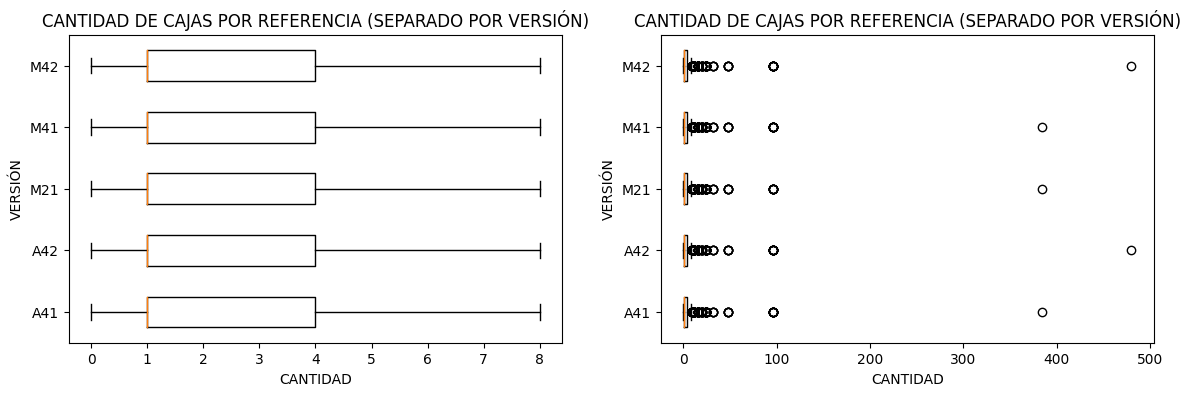

In [ ]:
fig, ax = plt.subplots(figsize=(14,4),nrows=1,ncols=2)
ax[0].boxplot(DSNX_2,vert=False,labels=DSNX_2.columns,showfliers=False) #Asi puedo sacar outliers
ax[0].set_xlabel('CANTIDAD')
ax[0].set_ylabel('VERSIÓN')
ax[0].set_title('CANTIDAD DE CAJAS POR REFERENCIA (SEPARADO POR VERSIÓN)')
ax[1].boxplot(DSNX_2,vert=False,labels=DSNX_2.columns,showfliers=True)
ax[1].set_xlabel('CANTIDAD')
ax[1].set_ylabel('VERSIÓN')
ax[1].set_title('CANTIDAD DE CAJAS POR REFERENCIA (SEPARADO POR VERSIÓN)')

Sabemos que las referencias vienen en cajas. Ahora, supongamos que hay en total 100 piezas de la referencia X. La pregunta es, en cuantas cajas vienen distribuídas esas 100 piezas? Abriendo 2 cajas ya cuento con las 100?

Efectivamente vemos que, para la mayoría de las referencias, abriendo entre 1 y 4 cajas ya contamos con el total de piezas de esa referencia. Solo en casos muy puntuales tenemos referencias cuyo total viene en muchas cajas.

Llama la atención que las distribuciones sean tan parecidas versión a versión, calculemos los valores para confirmarlo.

In [ ]:
q1= {clave: None for clave in DSNX_2.columns}
q2= {clave: None for clave in DSNX_2.columns}
q3= {clave: None for clave in DSNX_2.columns}
lim_min = {clave: None for clave in DSNX_2.columns}
lim_max = {clave: None for clave in DSNX_2.columns}

for i in DSNX_2.columns:
  q1[i] = DSNX_2[i].quantile(0.25) #1er cuartil
  q2[i] = DSNX_2[i].quantile(0.50) #Mediana
  q3[i] = DSNX_2[i].quantile(0.75) #3er cuartil
  lim_min[i] = q1[i] - (1.5 * (q3[i] - q1[i])) #Bigote inferior
  lim_max[i] = q3[i] + (1.5 * (q3[i] - q1[i])) #Bigote superior, cualquier punto más allá de los bigotes son outliers

print('q1:',q1)
print('q2:',q2)
print('q3:',q3)
print('lim_min:',lim_min)
print('lim_max:',lim_max)

q1: {'A41': 1.0, 'A42': 1.0, 'M21': 1.0, 'M41': 1.0, 'M42': 1.0}
q2: {'A41': 1.0, 'A42': 1.0, 'M21': 1.0, 'M41': 1.0, 'M42': 1.0}
q3: {'A41': 4.0, 'A42': 4.0, 'M21': 4.0, 'M41': 4.0, 'M42': 4.0}
lim_min: {'A41': -3.5, 'A42': -3.5, 'M21': -3.5, 'M41': -3.5, 'M42': -3.5}
lim_max: {'A41': 8.5, 'A42': 8.5, 'M21': 8.5, 'M41': 8.5, 'M42': 8.5}


Efectivamente las distribuciones son iguales. Procedamos a realizar un gráfico distinto para intentar explicarlo.

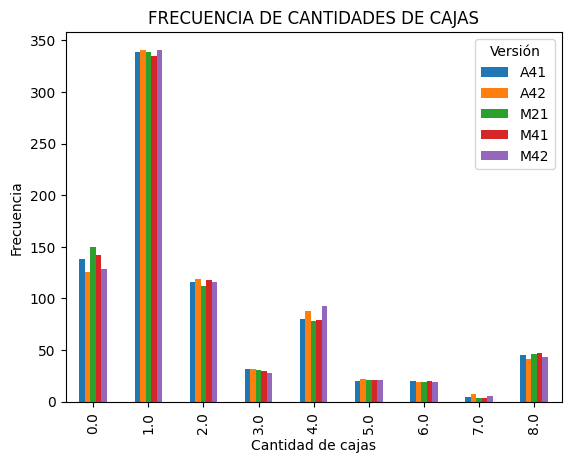

In [ ]:
value_counts = DSNX_2.apply(pd.value_counts)
value_counts = value_counts.loc[0:8]
value_counts.plot(kind='bar')
plt.xlabel('Cantidad de cajas')
plt.ylabel('Frecuencia')
plt.title('FRECUENCIA DE CANTIDADES DE CAJAS')
plt.legend(title='Versión')
plt.show()

Observamos que hay pequeñas diferencias entre las versiones, pero son tan mínimas que, a la hora de calcular las distribuciones, los cuartiles terminan siendo los mismos.

Esto significa que, cuando cambio de una versión a otra, las referencias que dejo de usar terminan siendo compensadas con las nuevas que comienzo a usar.

Supongamos que la versión A41 usa las referencias A, B y C. Al cambiar a la versión A42, dejo de usar la referencia B y comienzo a usar la D. La distribución no cambiará mucho, ya que D termina "compensando" a B.



###4.1.3 - Graficamos cuantas cajas vienen por base, diferenciando por versión y si la base es inspeccionable o no

A continuación el análisis, un pequeño glosario y el gráfico.

In [ ]:
DSNX_3 = DSNX.drop_duplicates(subset=['VERSION', 'BASE']) #Quiero saber cuantas bases de cada tipo tengo por versión
DSNX_3 = DSNX_3.reset_index(drop=True)
DSNX_3

CLASE VERSION    CONTENEDOR    BASE   TIPO BASE  LARGO BASE  ANCHO BASE  \
0       F1     M42   CMAU4908460  AF0001  IRON FRAME        2110         600   
1       F1     M42   CMAU4908460  AF0002  IRON FRAME        2110         600   
2       F1     M42   CMAU4908460  AF0003  IRON FRAME        2110         600   
3       F1     M42   CMAU4908460  AF0004  IRON FRAME        2110         600   
4       F1     M42   CMAU4908460  AF0005  IRON FRAME        2110         600   
...    ...     ...           ...     ...         ...         ...         ...   
2320     G     A42   TCKU7272146   HF026  IRON FRAME        2110         600   
2321     G     A42   TEMU8886138   HF027  IRON FRAME        2110         600   
2322     G     A42   TEMU8886138   HF028  IRON FRAME        2110         600   
2323     G     A42   TEMU8886138   HF029  IRON FRAME        2110         600   
2324     G     A42   TEMU8886138   HF030  IRON FRAME        2110         600   

      ALTURA BASE  PESO BASE    CAJA  ...       REFERENCIA  UNID/CAJA  \
0            1200      205.0  AF0001  ...     2804110-BU01         16   
1            1200      205.0  AF0002  ...     2804110-BU01         16   
2            1200      205.0  AF0003  ...     2804110-BU01         16   
3            1200      205.0  AF0004  ...     2804110-BU01         16   
4            1200      205.0  AF0005  ...     2804110-BU01         16   
...           ...        ...     ...  ...              ...        ...   
2320         1200      286.0  HC0065  ...  3101010-BU51-AA          1   
2321         1200      286.0  HC0049  ...  3101010-BU51-AA          1   
2322         1200      286.0  HC0033  ...  3101010-BU51-AA          1   
2323         1200      286.0  HC0017  ...  3101010-BU51-AA          1   
2324         1200      286.0  HC0001  ...  3101010-BU51-AA          1   

      CAJAS/BASE  REFS/BASE  CLASES/BASE INSPECCIÓN  REFS/CAJA  VOLUMEN CAJA  \
0              1          1            1          0          1        0.0221   
1              1          1            1          0          1        0.0221   
2              1          1            1          0          1        0.0221   
3              1          1            1          0          1        0.0221   
4              1          1            1          0          1        0.0221   
...          ...        ...          ...        ...        ...           ...   
2320          16          1            1          0          1        0.0625   
2321          16          1            1          0          1        0.0625   
2322          16          1            1          0          1        0.0625   
2323          16          1            1          0          1        0.0625   
2324          16          1            1          0          1        0.0625   

      VOL TOTAL  TIPO PALLET  
0        0.1326      DIRECTO  
1        0.1326      DIRECTO  
2        0.1326      DIRECTO  
3        0.1326      DIRECTO  
4        0.1326      DIRECTO  
...         ...          ...  
2320    30.0000      DIRECTO  
2321    30.0000      DIRECTO  
2322    30.0000      DIRECTO  
2323    30.0000      DIRECTO  
2324    30.0000      DIRECTO  

[2325 rows x 25 columns]

In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='CAJA') | (DSNX_IND['COLUMNA']=='BASE') | (DSNX_IND['COLUMNA']=='VERSION') | (DSNX_IND['COLUMNA']=='INSPECCIÓN')]

COLUMNA                                        DESCRIPCIÓN EJEMPLO 1  \
1      VERSION  Versión del producto al cual pertenece esta pieza       M42   
3         BASE                   Base en la cual viene esta pieza    AF0001   
9         CAJA                   Caja en la cual viene esta pieza    AF0001   
19  INSPECCIÓN    Indica si el pallet se deberá inspeccionar o no         0   

   EJEMPLO 2  
1        A42  
3      MP001  
9     MC0072  
19         1

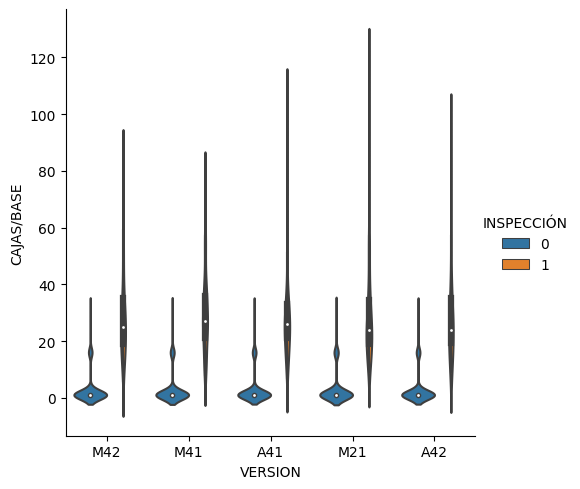

In [ ]:
sns.catplot(data=DSNX_3,kind='violin',y='CAJAS/BASE',x='VERSION',hue='INSPECCIÓN',split=False)

Aquí se pueden sacar varias conclusiones importantes:

1) Sabemos que entre más cajas tenga una base, más referencias distintas va a tener, ya que vimos que las referencias vienen generalmente en 1-4 cajas.

2) Si tiene más referencias, es más probable que haya más de una clase involucrada, y las bases inspeccionables son justamente aquellas que cumplen dicha condición.

3) Por ende, es natural pensar que las bases no inspeccionables generalmente tendrán pocas cajas, y las inspeccionables al contrario.

4) A pesar de esto, tenemos excepciones de bases no inspeccionables con muchas cajas, esto también coincide con el análisis de los gráficos anteriores, ya que habían referencias que excepcionalmente venían en muchas cajas.

5) Vemos que en este caso, las distribuciones versión a versión son parecidas, aunque no iguales. Analicemos mejor este punto.

In [ ]:
DSNX.groupby('VERSION')['CONTENEDOR'].nunique() #Cuantos contenedores tengo por versión?

VERSION
A41    35
A42    35
M21    35
M41    35
M42    35
Name: CONTENEDOR, dtype: int64

Hemos visto que la distribución de cantidad de cajas por referencia apenas varía versión a versión. A su vez, vemos que la cantidad de contenedores tampoco varía.

Por ende, si los contenedores no varían en cantidad, y las cajas por referencia tampoco, es lógico que las cajas por base tengan distribuciones muy similares.

###4.1.4 - Graficamos cuantas referencias coinciden por versión

A continuación el análisis, un pequeño glosario y el gráfico.

In [ ]:
DSNX_4 = DSNX.groupby(['REFERENCIA', 'VERSION'])['REFERENCIA'].nunique().unstack() #Con esto veo en que versión se usa cada referencia
DSNX_4 = DSNX_4.fillna(0)
DSNX_4['INDEX'] = DSNX_4.index
A41 = DSNX_4[DSNX_4.iloc[:, 0] == 1].iloc[:, 5]
A42 = DSNX_4[DSNX_4.iloc[:, 1] == 1].iloc[:, 5]
M21 = DSNX_4[DSNX_4.iloc[:, 2] == 1].iloc[:, 5]
M41 = DSNX_4[DSNX_4.iloc[:, 3] == 1].iloc[:, 5]
M42 = DSNX_4[DSNX_4.iloc[:, 4] == 1].iloc[:, 5]
DSNX_4

VERSION           A41  A42  M21  M41  M42             INDEX
REFERENCIA                                                 
09103-06002       1.0  1.0  1.0  1.0  1.0       09103-06002
09103-06005       1.0  1.0  1.0  1.0  1.0       09103-06005
09103-06006       1.0  1.0  1.0  1.0  1.0       09103-06006
09103-06006-S111  1.0  1.0  1.0  1.0  1.0  09103-06006-S111
09103-06007       1.0  1.0  1.0  1.0  1.0       09103-06007
...               ...  ...  ...  ...  ...               ...
GB/T3900-97       1.0  1.0  1.0  1.0  1.0       GB/T3900-97
Q2734816F31       1.0  1.0  1.0  1.0  1.0       Q2734816F31
Q4400412          1.0  1.0  1.0  1.0  1.0          Q4400412
Q5003232          1.0  1.0  1.0  1.0  1.0          Q5003232
Q673B105          1.0  1.0  1.0  1.0  1.0          Q673B105

[892 rows x 6 columns]

In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='REFERENCIA') | (DSNX_IND['COLUMNA']=='VERSION')]

COLUMNA                                        DESCRIPCIÓN  \
1      VERSION  Versión del producto al cual pertenece esta pieza   
15  REFERENCIA                               Código de esta pieza   

       EJEMPLO 1     EJEMPLO 2  
1            M42           A42  
15  2804110-BU01  6900006P201D

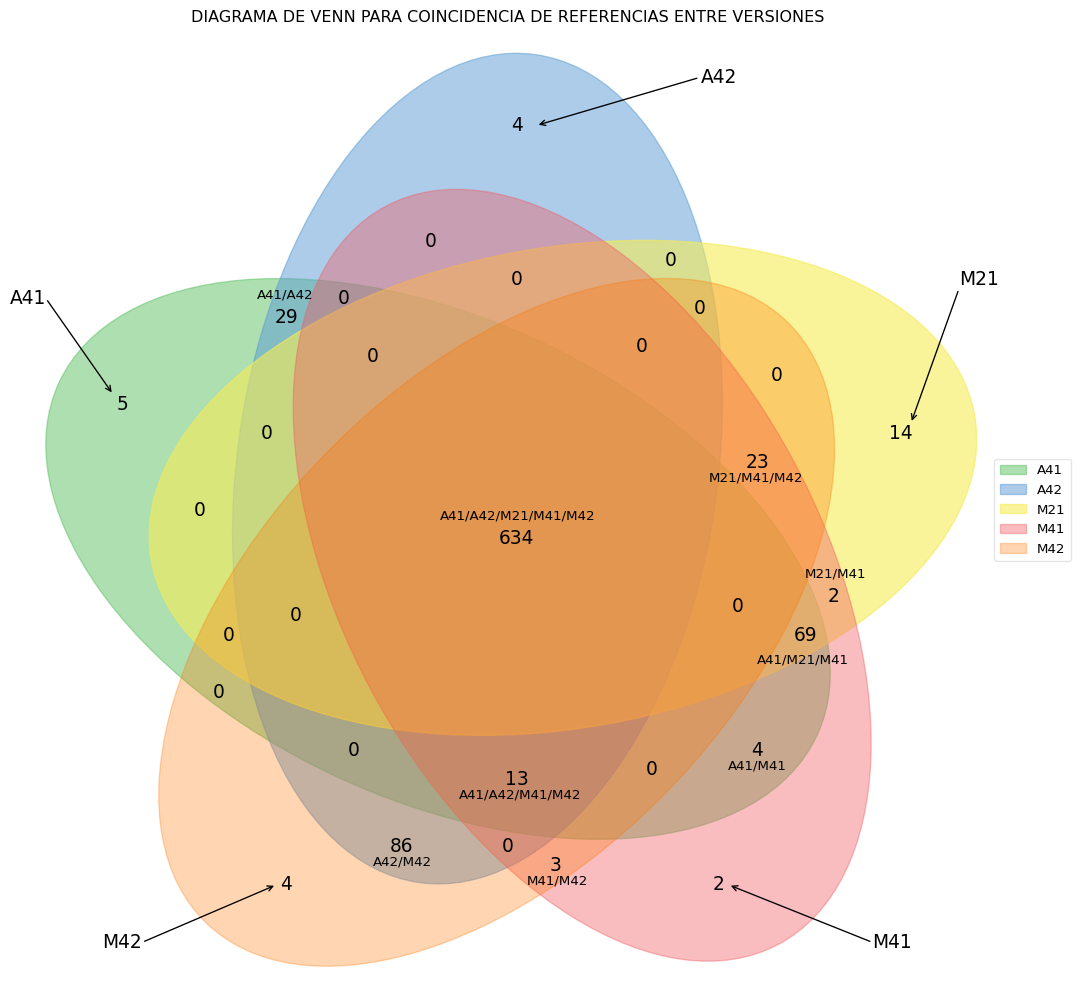

In [ ]:
labels = venn.get_labels([A41, A42, M21, M41, M42], fill=['number'])
fig, ax = venn.venn5(labels, names=['A41', 'A42', 'M21', 'M41', 'M42'])
ax.set_title('DIAGRAMA DE VENN PARA COINCIDENCIA DE REFERENCIAS ENTRE VERSIONES')

ax.annotate('A41/A42', xy=(0.24, 0.72), xytext=(0.24, 0.72))
ax.annotate('M21/M41/M42', xy=(0.71, 0.53), xytext=(0.71, 0.53))
ax.annotate('A41/M21/M41', xy=(0.76, 0.34), xytext=(0.76, 0.34))
ax.annotate('M21/M41', xy=(0.81, 0.43), xytext=(0.81, 0.43))
ax.annotate('A41/M41', xy=(0.73, 0.23), xytext=(0.73, 0.23))
ax.annotate('A41/A42/M41/M42', xy=(0.45, 0.20), xytext=(0.45, 0.20))
ax.annotate('A42/M42', xy=(0.36, 0.13), xytext=(0.36, 0.13))
ax.annotate('M41/M42', xy=(0.52, 0.11), xytext=(0.52, 0.11))
ax.annotate('A41/A42/M21/M41/M42', xy=(0.43, 0.49), xytext=(0.43, 0.49))
plt.annotate('', xy=(0.26, 0.11), xytext=(0.12, 0.05), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('', xy=(0.73, 0.11), xytext=(0.88, 0.05), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('', xy=(0.09, 0.62), xytext=(0.02, 0.72), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('', xy=(0.92, 0.59), xytext=(0.97, 0.73), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('', xy=(0.53, 0.90), xytext=(0.70, 0.95), arrowprops=dict(facecolor='black', arrowstyle='->'))
fig.show()

Se generan 5 conjuntos, cada uno correspondiente a una versión. Lo que se ilustra en este gráfico es la cantidad de referencias que coinciden entre estas versiones.

Como se puede ver, tenemos 634 referencias comunes a las 5 versiones (71%), y luego distintas cantidades para cada combinación posible.

Esto sucede porque el producto tiene 3 funcionalidades (X-Y-Z):

X. Puede ser A o M.

Y. Puede ser 4 o 2.

Z. Puede ser 2 o 1.

Por ejemplo, la zona A42/M42 contiene 86. Esto significa que hay 86 referencias que solo utilizan estas dos versiones (por ser las únicas dos con las funcionalidades Y=4 y Z=2 a la vez).

Por otro lado, la zona A41/A42 contiene 29. En este caso hay 29 referencias que solo utilizan estas dos versiones (por ser las únicas dos con las funcionalidades X=A y Y=4) a la vez.

Los modelos A42/M21 no tienen nada en común, no comparten referencias en ningún cruce, salvo en el central que son las referencias comunes a todas las versiones. Profundizaremos en estos temas más adelante.

###4.1.5 - Graficamos cuantos pallets de cada tipo pertenecen a cada clase, promediando por versión

A continuación el análisis, un pequeño glosario y un par de gráficos.

In [ ]:
DSNX_5 = DSNX.pivot_table(index=['VERSION','CLASE'], columns='TIPO PALLET', values='VOLUMEN CAJA', aggfunc='sum') #Calculo el volumen total por clase, por versión
DSNX_5 = DSNX_5.fillna(0)
DSNX_5 = DSNX_5.groupby('CLASE').mean() #Promedio las versiones
DSNX_5 = DSNX_5/VOL_PALLET
DSNX_5 = DSNX_5.apply(np.ceil) #Redondeo para arriba
DSNX_5

TIPO PALLET  DEDICADO  DIRECTO  MIXTO
CLASE                                
A                 0.0      0.0    1.0
CA1               4.0      0.0    7.0
CA2               4.0      0.0    5.0
CA3               4.0      0.0    7.0
CA4               3.0      0.0    9.0
CA5               7.0      0.0    6.0
CA6              27.0      0.0    5.0
CA7              11.0      0.0    7.0
CH1              12.0    200.0    2.0
CH2               0.0     17.0    7.0
CH3               0.0      0.0    2.0
CH4               4.0      0.0    3.0
CH6              18.0      0.0    1.0
E                 0.0     28.0    1.0
F1                0.0      3.0    3.0
F2               12.0      0.0   10.0
F3                9.0      0.0    9.0
F4                0.0      0.0    3.0
F5                0.0      0.0    1.0
F6                0.0      0.0    2.0
G                 0.0     18.0    0.0
M                 0.0     20.0    4.0
PI                0.0      0.0    1.0
PL                4.0     16.0    8.0
S                 0.0    639.0    1.0
SP                0.0      0.0    1.0
TA               37.0     23.0    8.0
TO                0.0      0.0    2.0

In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='CLASE') | (DSNX_IND['COLUMNA']=='CANT PALLETS') | (DSNX_IND['COLUMNA']=='TIPO PALLET') | (DSNX_IND['COLUMNA']=='VERSION') | (DSNX_IND['COLUMNA']=='VOL TOTAL')]

COLUMNA                                        DESCRIPCIÓN EJEMPLO 1  \
0          CLASE           Sector en el cual se ensambla esta pieza        F1   
1        VERSION  Versión del producto al cual pertenece esta pieza       M42   
22     VOL TOTAL         Vol. que ocupa esta referencia en su clase    0.1356   
23  CANT PALLETS    Cantidad de pallets que representa el VOL TOTAL         1   
24   TIPO PALLET            Indica pallet dedicado, mixto o directo   DIRECTO   

   EJEMPLO 2  
0          A  
1        A42  
22     0.156  
23         3  
24  DEDICADO

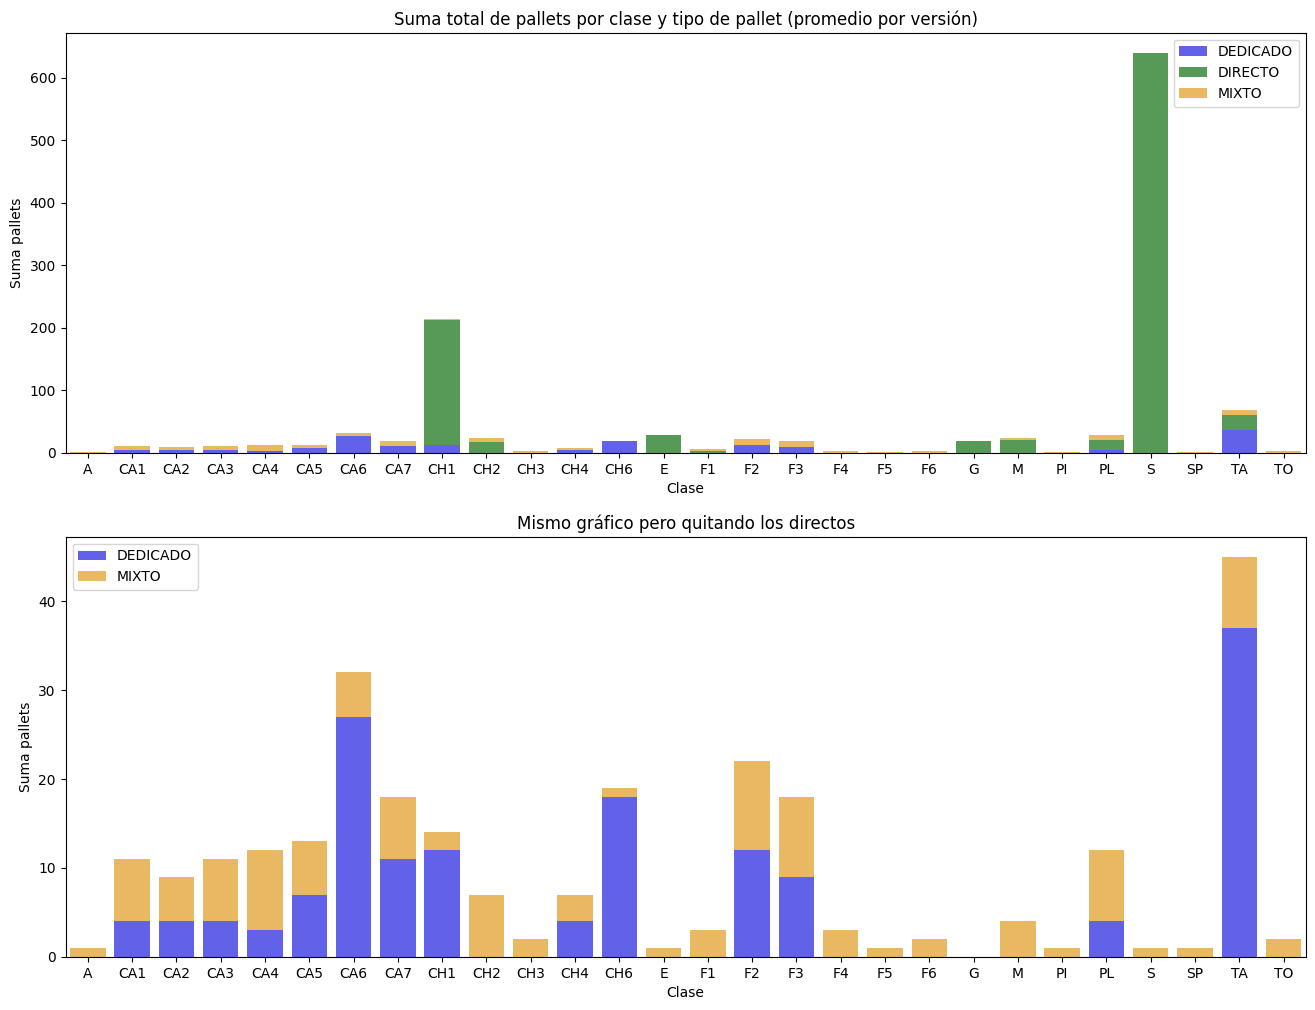

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
sns.barplot(data=DSNX_5, x=DSNX_5.index, y='DEDICADO', color='blue', label='DEDICADO', alpha=0.7, ax=ax1)
sns.barplot(data=DSNX_5, x=DSNX_5.index, y='DIRECTO', color='green', label='DIRECTO', alpha=0.7, bottom=DSNX_5['DEDICADO'], ax=ax1)
sns.barplot(data=DSNX_5, x=DSNX_5.index, y='MIXTO', color='orange', label='MIXTO', alpha=0.7, bottom=DSNX_5['DEDICADO'] + DSNX_5['DIRECTO'], ax=ax1)

sns.barplot(data=DSNX_5, x=DSNX_5.index, y='DEDICADO', color='blue', label='DEDICADO', alpha=0.7, ax=ax2)
sns.barplot(data=DSNX_5, x=DSNX_5.index, y='MIXTO', color='orange', label='MIXTO', alpha=0.7, bottom=DSNX_5['DEDICADO'], ax=ax2)

ax1.set_title('Suma total de pallets por clase y tipo de pallet (promedio por versión)')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Suma pallets')
ax1.legend()

ax2.set_title('Mismo gráfico pero quitando los directos')
ax2.set_xlabel('Clase')
ax2.set_ylabel('Suma pallets')
ax2.legend()

Las clases "S" y "CH1" conllevan gran cantidad de pallets directos, esto sucede porque suelen estar compuestos por referencias que conllevan gran volumen, son piezas estructurales del producto.

Luego repetimos el mismo gráfico pero quitando los directos, para que se aprecie mejor la distribución entre dedicados y mixtos. Ya en este gráfico se empieza a dejar ver cuales son las clases que requerirán más espacio de almacenamiento.

###4.1.6 - Graficamos un mapa de calor para ver la diferencia entre versiones

A continuación el análisis, un pequeño glosario y el gráfico.

In [ ]:
#El objetivo aqui fue generar una matriz con la versión como índice y como columna, para poder ver la diferencia de piezas de versión a versión
DSNX_6 = pd.DataFrame(index=DSNX_4.columns[:5], columns=DSNX_4.columns[:5])
total=0
for k in DSNX_4.columns[:5]:
  for j in DSNX_4.columns[:5]:
    for i in DSNX_4.index:
      if DSNX_4.loc[i,j]!=DSNX_4.loc[i,k]:
        total+=1 #Voy recorriendo el DSNX_4 para cada par de versiones, si las dos valen 1 o 0, significa que ambas usan (o no) la referencia. Por ello solo sumo uno si los valores difieren
    DSNX_6.loc[k,j]=total
    total=0
DSNX_6 = DSNX_6.astype(float)
DSNX_6

VERSION    A41    A42    M21    M41    M42
VERSION                                   
A41        0.0  168.0   90.0   64.0  223.0
A42      168.0    0.0  240.0  222.0   63.0
M21       90.0  240.0    0.0   36.0  191.0
M41       64.0  222.0   36.0    0.0  167.0
M42      223.0   63.0  191.0  167.0    0.0

In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='REFERENCIA') | (DSNX_IND['COLUMNA']=='VERSION')]

COLUMNA                                        DESCRIPCIÓN  \
1      VERSION  Versión del producto al cual pertenece esta pieza   
15  REFERENCIA                               Código de esta pieza   

       EJEMPLO 1     EJEMPLO 2  
1            M42           A42  
15  2804110-BU01  6900006P201D

Text(0.5, 1.0, 'DIFERENCIA DE USO DE REFERENCIAS ENTRE VERSIONES')

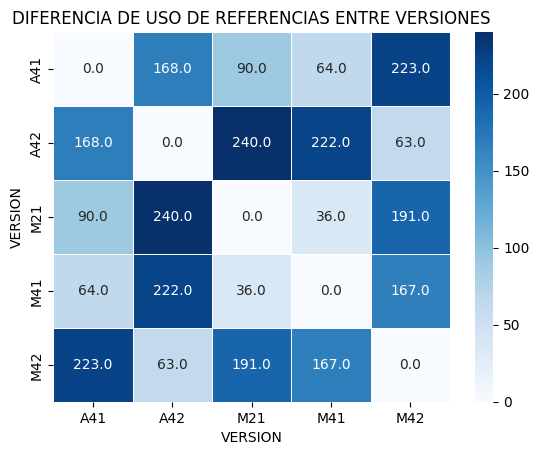

In [ ]:
sns.heatmap(DSNX_6,annot=True,fmt=".1f",linewidth=.5,cmap="Blues")
plt.title('DIFERENCIA DE USO DE REFERENCIAS ENTRE VERSIONES')

Obviamente la diagonal valdrá 0 ya que sería una comparación entre la misma versión, luego vemos que la que tiene más diferencias es la M21 con la A42.

Como se expicó anteriormente, esto tiene sentido ya que cada versión consta de 3 funciones. Las versiones A41 y A42 difieren solo en una función, mientras que las M21 y A42 difieren en las tres funciones (por ello son las que más difieren en las referencias que usan).

###4.1.7 - Insights y conclusión

1)	Las clases contienen más o menos la misma cantidad de referencias distintas. Solo la clase “TO” sobresale.

2)	La mayoría de las referencias vienen en su totalidad en 1-4 cajas. Solo algunas puntuales vienen en más cantidad.

3)	El punto anterior no varía versión a versión, las distribuciones son iguales.

4)	Las bases no inspeccionables traen pocas cajas, salvo excepciones. Las inspeccionables, lo opuesto.

5)	El punto anterior prácticamente no varía versión a versión.

6)	La cantidad de contenedores por versión es la misma.

7)	El 71% de las referencias son comunes a todas las versiones, el 29% restante son las que se usan dependiendo de las funcionalidades X-Y-Z.

8)	Las clases “S” y “CH1” son las que más pallets directos llevan.

9)	Entre más funcionalidades compartan dos versiones, más piezas en común tendrán.


##4.2 - Feature engineering

###4.2.1 - Selección de variables de interés

En esta etapa del proyecto analizaremos el packaging de las cajas.

Muchas veces sucede que, debido a roturas, logística tenga que pedir puntualmente al proveedor cajas con piezas para realizar reemplazos.

En virtud de esto, es de interés saber si es posible predecir que tipo de packaging enviará el proveedor, en función del contenido que tendrá la caja (o sea en función del pedido de piezas a reponer).

Tener esta información ayudaría a preparar de manera anticipada, las condiciones de almacenamiento necesarias para dicho arribo de producto.

A su vez, poder deducir el criterio que usa el proveedor para seleccionar el packaging, podría ayudar a dar recomendaciones al mismo de cómo mejorarlo.

In [ ]:
DSNX_7 = DSNX[['VERSION','CAJA','PESO CAJA','VOLUMEN CAJA','UNID/CAJA','REFS/CAJA','TIPO CAJA']] #Me quedo con las columnas que me interesan del DS original.
DSNX_7

VERSION    CAJA  PESO CAJA  VOLUMEN CAJA  UNID/CAJA  REFS/CAJA  \
0         M42  AF0001     153.92        0.0221         16          1   
1         M42  AF0002     153.92        0.0221         16          1   
2         M42  AF0003     153.92        0.0221         16          1   
3         M42  AF0004     153.92        0.0221         16          1   
4         M42  AF0005     153.92        0.0221         16          1   
...       ...     ...        ...           ...        ...        ...   
23096     A42  HC0012      15.05        0.0625          1          1   
23097     A42  HC0013      15.05        0.0625          1          1   
23098     A42  HC0014      15.05        0.0625          1          1   
23099     A42  HC0015      15.05        0.0625          1          1   
23100     A42  HC0016      15.05        0.0625          1          1   

        TIPO CAJA  
0      IRON FRAME  
1      IRON FRAME  
2      IRON FRAME  
3      IRON FRAME  
4      IRON FRAME  
...           ...  
23096      CARTON  
23097      CARTON  
23098      CARTON  
23099      CARTON  
23100      CARTON  

[23101 rows x 7 columns]

La información del DS original que nos servirá, deberá tener que ver con cajas. Por ese motivo es que descartamos las columnas clase, contenedor y todo lo relacionado a bases o pallets. A su vez, el código de la referencia tampoco será de ayuda, ya que lo importante será el peso y volumen de la misma.

Siguiendo esta idea, nos quedarían las columnas con las que estamos trabajando. Cuando logística quiera hacer un pedido, deberá contar con el peso total de lo que va a pedir, el volumen, la cantidad de unidades y cuantas referencias distintas estará pidiendo.

Por otra parte, cabe destacar que en el DS tenemos cajas repetidas. Esto sucede porque algunas de ellas traen más de una referencia dentro, y esta información se subdivide en varias filas, veamos un ejemplo.

In [ ]:
DSNX[(DSNX['CAJA']=='AC1077') & (DSNX['VERSION']=='M42')]

CLASE VERSION   CONTENEDOR    BASE   TIPO BASE  LARGO BASE  ANCHO BASE  \
489    F5     M42  CMAU8944850  AF0091  IRON FRAME        1700         650   
490    F5     M42  CMAU8944850  AF0091  IRON FRAME        1700         650   
491    F5     M42  CMAU8944850  AF0091  IRON FRAME        1700         650   

     ALTURA BASE  PESO BASE    CAJA  ...    REFERENCIA  UNID/CAJA  CAJAS/BASE  \
489         1250     639.21  AC1077  ...  3918910-BU01         24          39   
490         1250     639.21  AC1077  ...  3918911-BU01         24          39   
491         1250     639.21  AC1077  ...  3918922-BU01         24          39   

     REFS/BASE  CLASES/BASE INSPECCIÓN  REFS/CAJA  VOLUMEN CAJA  VOL TOTAL  \
489         10            6          1          3        0.0192     0.0768   
490         10            6          1          3        0.0192     0.0768   
491         10            6          1          3        0.0192     0.0768   

     TIPO PALLET  
489        MIXTO  
490        MIXTO  
491        MIXTO  

[3 rows x 25 columns]

En el ejemplo anterior, tenemos 3 referencias en la caja AF0091. En la columna REFS/CAJA vemos el valor 3, y en la columna UNID/CAJA indica que hay 24 de cada una dentro.

Por este motivo, haremos un cálculo para determinar realmente el número de unidades por caja, que en este ejemplo sería 24*3=72.

In [ ]:
DSNX_7['UNID/CAJA'] = DSNX_7.groupby(['VERSION','CAJA'])['UNID/CAJA'].transform('sum') #Agrupo por caja y sumo unidades
DSNX_7

<ipython-input-39-1ae2873eaf32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DSNX_7['UNID/CAJA'] = DSNX_7.groupby(['VERSION','CAJA'])['UNID/CAJA'].transform('sum') #Agrupo por caja y sumo unidades


VERSION    CAJA  PESO CAJA  VOLUMEN CAJA  UNID/CAJA  REFS/CAJA  \
0         M42  AF0001     153.92        0.0221         16          1   
1         M42  AF0002     153.92        0.0221         16          1   
2         M42  AF0003     153.92        0.0221         16          1   
3         M42  AF0004     153.92        0.0221         16          1   
4         M42  AF0005     153.92        0.0221         16          1   
...       ...     ...        ...           ...        ...        ...   
23096     A42  HC0012      15.05        0.0625          1          1   
23097     A42  HC0013      15.05        0.0625          1          1   
23098     A42  HC0014      15.05        0.0625          1          1   
23099     A42  HC0015      15.05        0.0625          1          1   
23100     A42  HC0016      15.05        0.0625          1          1   

        TIPO CAJA  
0      IRON FRAME  
1      IRON FRAME  
2      IRON FRAME  
3      IRON FRAME  
4      IRON FRAME  
...           ...  
23096      CARTON  
23097      CARTON  
23098      CARTON  
23099      CARTON  
23100      CARTON  

[23101 rows x 7 columns]

In [ ]:
DSNX_7 = DSNX_7.drop_duplicates(subset=['VERSION', 'CAJA']) #Borro cajas duplicadas
DSNX_7 = DSNX_7.reset_index(drop=True)
DSNX_7

VERSION    CAJA  PESO CAJA  VOLUMEN CAJA  UNID/CAJA  REFS/CAJA  \
0         M42  AF0001     153.92        0.0221         16          1   
1         M42  AF0002     153.92        0.0221         16          1   
2         M42  AF0003     153.92        0.0221         16          1   
3         M42  AF0004     153.92        0.0221         16          1   
4         M42  AF0005     153.92        0.0221         16          1   
...       ...     ...        ...           ...        ...        ...   
21774     A42  HC0012      15.05        0.0625          1          1   
21775     A42  HC0013      15.05        0.0625          1          1   
21776     A42  HC0014      15.05        0.0625          1          1   
21777     A42  HC0015      15.05        0.0625          1          1   
21778     A42  HC0016      15.05        0.0625          1          1   

        TIPO CAJA  
0      IRON FRAME  
1      IRON FRAME  
2      IRON FRAME  
3      IRON FRAME  
4      IRON FRAME  
...           ...  
21774      CARTON  
21775      CARTON  
21776      CARTON  
21777      CARTON  
21778      CARTON  

[21779 rows x 7 columns]

In [ ]:
DSNX_7[(DSNX_7['CAJA']=='AC1077') & (DSNX_7['VERSION']=='M42')] #Chequeo que quedó ok, como comenté antes, el valor correcto debería ser 72 unid/caja y 3 ref/caja

VERSION    CAJA  PESO CAJA  VOLUMEN CAJA  UNID/CAJA  REFS/CAJA TIPO CAJA
489     M42  AC1077      19.97        0.0192         72          3    CARTON

In [ ]:
reemplazos = {'BUBBLE FILM': 1, 'CARTON': 2, 'IRON FRAME': 3, 'IRON TRAY': 4, 'WOOD FRAME':5} #Reemplazo los strings por números para comenzar a trabajar
DSNX_7['TIPO CAJA ORIGINAL'] = DSNX_7['TIPO CAJA']
DSNX_7['TIPO CAJA'] = DSNX_7['TIPO CAJA'].replace(reemplazos)
DSNX_7

VERSION    CAJA  PESO CAJA  VOLUMEN CAJA  UNID/CAJA  REFS/CAJA  \
0         M42  AF0001     153.92        0.0221         16          1   
1         M42  AF0002     153.92        0.0221         16          1   
2         M42  AF0003     153.92        0.0221         16          1   
3         M42  AF0004     153.92        0.0221         16          1   
4         M42  AF0005     153.92        0.0221         16          1   
...       ...     ...        ...           ...        ...        ...   
21774     A42  HC0012      15.05        0.0625          1          1   
21775     A42  HC0013      15.05        0.0625          1          1   
21776     A42  HC0014      15.05        0.0625          1          1   
21777     A42  HC0015      15.05        0.0625          1          1   
21778     A42  HC0016      15.05        0.0625          1          1   

       TIPO CAJA TIPO CAJA ORIGINAL  
0              3         IRON FRAME  
1              3         IRON FRAME  
2              3         IRON FRAME  
3              3         IRON FRAME  
4              3         IRON FRAME  
...          ...                ...  
21774          2             CARTON  
21775          2             CARTON  
21776          2             CARTON  
21777          2             CARTON  
21778          2             CARTON  

[21779 rows x 8 columns]

Para X (variables independientes) me quedo solamente con las columnas PESO CAJA, VOLUMEN CAJA, UNID/CAJA y REFS/CAJA.

Para Y (variable dependiente) con la columna TIPO CAJA.

###4.2.2 - Correlación entre variables

Ahora, apliquemos regresión a cada par de variables independientes, y generemos una matriz con los R2 y BETAS de cada par. De esta forma podremos chequear que tan independienes son entre sí.

Text(0.5, 1.0, 'BETA DE CADA PAR DE VARIABLES')

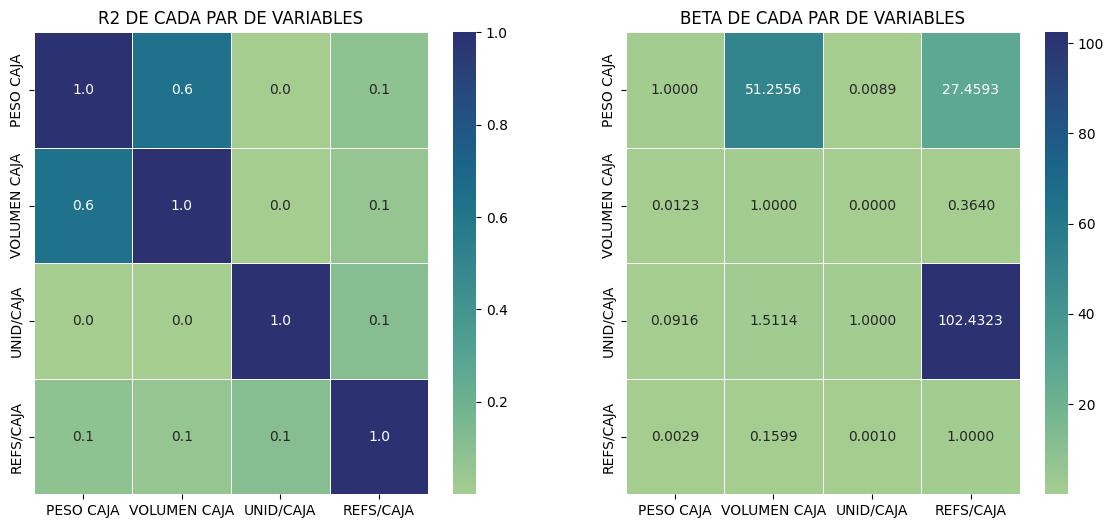

In [ ]:
R2 = pd.DataFrame(index=DSNX_7.columns[2:6], columns=DSNX_7.columns[2:6])
BETAS = pd.DataFrame(index=DSNX_7.columns[2:6], columns=DSNX_7.columns[2:6])
for i in DSNX_7.columns[2:6]:
  for j in DSNX_7.columns[2:6]:
    model = sm.OLS(DSNX_7[i], DSNX_7[j]).fit()
    R2.loc[i,j]=model.rsquared
    BETAS.loc[i,j]=model.params[j]

R2 = R2.astype(float)
BETAS = BETAS.astype(float)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(R2,ax=ax1,annot=True, fmt=".1f", linewidth=.5, cmap="crest")
ax1.set_title('R2 DE CADA PAR DE VARIABLES')
sns.heatmap(BETAS,ax=ax2,annot=True, fmt=".4f", linewidth=.5, cmap="crest")
ax2.set_title('BETA DE CADA PAR DE VARIABLES')

Como vemos, en el único par que encontramos algo de relación es entre el peso y el volumen, cosa que en realidad es bastante lógica. Con respecto a lo demás, no hay relaciones claras.

Con respecto a los beta, llama la atención que los valores de 'PESO CAJA' en función del 'VOLUMEN CAJA' y 'VOLUMEN CAJA' en función del 'PESO CAJA' no sean inversos.

También podemos hacer la matriz de correlación para verlo resumido gráficamente.

<ipython-input-44-850f14e34528>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DSNX_7.corr())


Text(0.5, 1.0, 'MATRIZ DE CORRELACIÓN')

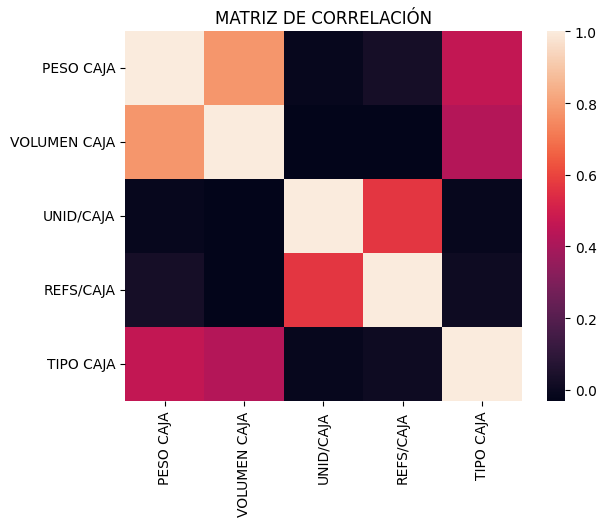

In [ ]:
sns.heatmap(DSNX_7.corr())
plt.title('MATRIZ DE CORRELACIÓN')



Continuando, apliquemos PCA para reducir la dimensionalidad.

###4.2.3 - Aplicación de PCA

In [ ]:
pca_obj = PCA() #Aplico PCA
PCA_DSNX_7 = pd.DataFrame(pca_obj.fit_transform(DSNX_7.iloc[:,2:6]))
PCA_DSNX_7

0           1         2         3
0     -33.448624  121.595201  1.910807 -0.105481
1     -33.448624  121.595201  1.910807 -0.105481
2     -33.448624  121.595201  1.910807 -0.105481
3     -33.448624  121.595201  1.910807 -0.105481
4     -33.448624  121.595201  1.910807 -0.105481
...          ...         ...       ...       ...
21774 -47.884310  -17.323971  0.193862 -0.032460
21775 -47.884310  -17.323971  0.193862 -0.032460
21776 -47.884310  -17.323971  0.193862 -0.032460
21777 -47.884310  -17.323971  0.193862 -0.032460
21778 -47.884310  -17.323971  0.193862 -0.032460

[21779 rows x 4 columns]

In [ ]:
pca_obj.explained_variance_ratio_ #Veo que con las dos primeras columnas me quedo aproximadamente con el 100% de la info.

array([9.16901379e-01, 8.30897955e-02, 8.02028222e-06, 8.04837781e-07])

In [ ]:
PCA_DSNX_7 = PCA_DSNX_7.drop([2,3], axis=1) #Elimino columna 2 y 3
PCA_DSNX_7

0           1
0     -33.448624  121.595201
1     -33.448624  121.595201
2     -33.448624  121.595201
3     -33.448624  121.595201
4     -33.448624  121.595201
...          ...         ...
21774 -47.884310  -17.323971
21775 -47.884310  -17.323971
21776 -47.884310  -17.323971
21777 -47.884310  -17.323971
21778 -47.884310  -17.323971

[21779 rows x 2 columns]

##4.3 - Modelos de machine learning

###4.3.1 - Decision Tree Classifier

Ahora sí, divido el DS en uno para entrenar, uno para validar y otro para testear:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(PCA_DSNX_7,DSNX_7.iloc[:,6], test_size=0.3, random_state=42) #Divido DS en train y test
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size=0.5, random_state=42) #Divido el test en validación y test
print('Dimensiones matriz de entrenamiento:',x_train.shape)
print('Dimensiones matriz de testeo:',x_test.shape)
print('Dimensiones matriz de validación:',x_val.shape)

Dimensiones matriz de entrenamiento: (15245, 2)
Dimensiones matriz de testeo: (3267, 2)
Dimensiones matriz de validación: (3267, 2)


Para no perder el hilo, es importante recordar lo que estamos queriendo realizar aquí.

La idea es poder predecir en qué packaging el proveedor enviará el pedido que logística tenga que hacerle para cubrir alguna rotura de piezas.

Como ejemplo práctico, supongamos que logística quiere pedir un envío especial de 2 tipos de referencias.

Como se explicó antes, para entrenar el modelo usamos la información del peso y volumen de cada caja. Cuando logística quiera pedir esta reposición de piezas, no va a tener estos datos, lo único que tendrá es un ejemplo de cada pieza que deba reponer, por lo que deberá:

1) Pesar la referencia A y la referencia B.

2) Calcular el volumen de la referencia A y de la referencia B.

3) Multiplicar dichos valores por la cantidad a pedir de cada una.

Con esto tendremos un valor de cuanto pesará el pedido y qué volumen ocupa en función de las referencias sueltas, ya que no tenemos la caja. Con esta información si podremos entrar al modelo e intentar predecir el tipo de caja.

1) Referencia A:

  Cantidad: 48 - Peso: 0.2kg c/u - Volumen: 0.006m3 c/u
  
2) Referencia B:

  Cantidad: 20 - Peso: 0.5kg c/u - Volumen: 0.010m3 c/u

Veámoslo resumido.

In [ ]:
prueba = pd.DataFrame(columns=DSNX_7.columns[2:6])
prueba.loc[0,'PESO CAJA'] = 0.2*48 + 0.5*20
prueba.loc[0,'VOLUMEN CAJA'] = 0.006*48 + 0.010*20
prueba.loc[0,'UNID/CAJA'] = 48 + 20
prueba.loc[0,'REFS/CAJA'] = 2
prueba

PESO CAJA VOLUMEN CAJA UNID/CAJA REFS/CAJA
0      19.6        0.488        68         2

Con esta información deberíamos entrar al modelo.

Cerrando la idea, por todo esto fue que aplicamos PCA a esas columnas y no a todas; el nombre de la caja no es relevante, y la versión tampoco, ya que como vimos en el EDA, no hay grandes variaciones en la distribución de cajas yendo versión a versión.

In [ ]:
modelo_arbol = DecisionTreeClassifier() #Entreno
modelo_arbol.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = modelo_arbol.predict(x_test) #Testeo
#DSNX_7.to_excel('PREDICTO.xlsx', index=False)
y_predict

array([3, 2, 1, ..., 2, 2, 2])

In [ ]:
confusion = pd.DataFrame(index=['TP','FP','TN','FN'], columns=range(1,6)) #Armo una matriz para colocar los valores de la matriz de confusión por tipo de packaging
confusion[:] = 0
for j,k in zip(y_test,y_predict): #Voy iterando con los valores de la columna del dato real y la predicha
  if j==k:
    for i in confusion.columns:
      if i==j:
        confusion.loc['TP',i] += 1
      else:
        confusion.loc['TN',i] += 1
  else:
    for i in confusion.columns:
      if i==j:
        confusion.loc['FN',i] += 1
      elif i==k:
        confusion.loc['FP',i] += 1
      else:
        confusion.loc['TN',i] += 1
confusion #Printeo la matriz de confusión para ver como le fue al modelo

1     2     3     4     5
TP   129  2857   224     7    42
FP     0     5     2     1     0
TN  3133   403  3041  3258  3225
FN     5     2     0     1     0

Text(0.5, 1.0, 'MATRIZ DE CONFUSIÓN')

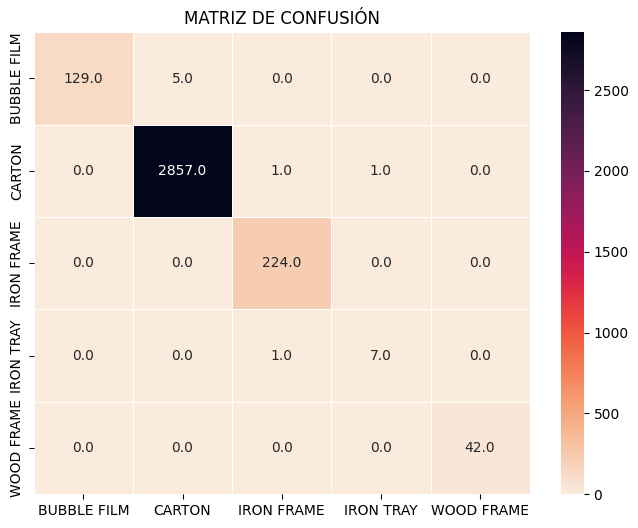

In [ ]:
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".1f", linewidth=.5, cmap="rocket_r", xticklabels=reemplazos.keys(), yticklabels=reemplazos.keys())
plt.title('MATRIZ DE CONFUSIÓN') #Genero la matriz de confusión de manera gráfica

La zona diagonal son los TP (verdaderos positivos), el resto de los valores representan tanto FP como FN.

Vemos que en general el modelo acierta el tipo de packaging, ya que la diagonal es la zona que tiene más cantidad de datos.

Ahora calculemos las métricas, para tener un valor certero de desempeño.

###4.3.2 - Métricas de desempeño

In [ ]:
metricas = pd.DataFrame(index=['Precision','Recall','Accuracy','Specificity','F1'], columns=range(1,6)) #Creo una matriz para almacenar las métricas por tipo de packaging
for i in metricas.columns:
  metricas.loc['Precision',i] = confusion.loc['TP',i] / (confusion.loc['TP',i] + confusion.loc['FP',i])
  metricas.loc['Recall',i] = confusion.loc['TP',i] / (confusion.loc['TP',i] + confusion.loc['FN',i])
  metricas.loc['Accuracy',i] = (confusion.loc['TP',i] + confusion.loc['TN',i]) / confusion[i].sum()
  metricas.loc['Specificity',i] = confusion.loc['TN',i] / (confusion.loc['TN',i] + confusion.loc['FP',i])
  try:
    metricas.loc['F1',i] = 2 * metricas.loc['Recall',i] * metricas.loc['Precision',i] / (metricas.loc['Recall',i] + metricas.loc['Precision',i])
  except:
    metricas.loc['F1',i] = 0
metricas.columns = reemplazos.keys()
metricas['Promedio'] = metricas.mean(axis=1)
metricas #Printeo la matriz completa

BUBBLE FILM    CARTON IRON FRAME IRON TRAY WOOD FRAME  Promedio
Precision           1.0  0.998253    0.99115     0.875        1.0  0.972881
Recall         0.962687    0.9993        1.0     0.875        1.0  0.967397
Accuracy        0.99847  0.997857   0.999388  0.999388        1.0  0.999021
Specificity         1.0  0.987745   0.999343  0.999693        1.0  0.997356
F1             0.980989  0.998776   0.995556     0.875        1.0  0.970064

Así serían los resultados de las métricas calculados individualmente, calculemos ahora métricas más generales utilizando la librería.

In [ ]:
metricas.loc['Precision','Sklearn Metrics'] = precision_score(y_test,y_predict,average='macro')
metricas.loc['Recall','Sklearn Metrics'] = recall_score(y_test,y_predict,average='macro')
metricas.loc['Accuracy','Sklearn Metrics'] = accuracy_score(y_test,y_predict)
metricas.loc['Specificity','Sklearn Metrics'] = 'S/D'
metricas.loc['F1','Sklearn Metrics'] = f1_score(y_test,y_predict,average='macro')
metricas

BUBBLE FILM    CARTON IRON FRAME IRON TRAY WOOD FRAME  Promedio  \
Precision           1.0  0.998253    0.99115     0.875        1.0  0.972881   
Recall         0.962687    0.9993        1.0     0.875        1.0  0.967397   
Accuracy        0.99847  0.997857   0.999388  0.999388        1.0  0.999021   
Specificity         1.0  0.987745   0.999343  0.999693        1.0  0.997356   
F1             0.980989  0.998776   0.995556     0.875        1.0  0.970064   

            Sklearn Metrics  
Precision          0.972881  
Recall             0.967397  
Accuracy           0.997551  
Specificity             S/D  
F1                 0.970064

Como la librería no nos da la posibilidad de calcular la Specificity, nos queda vacío ese dato.

En cuanto al resto, los resultados práctiamente no varían.

Probemos con otro modelo.

###4.3.3 - Random Forest Classifier

In [ ]:
modelo_arbol2 = RandomForestClassifier() #Entreno
modelo_arbol2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict2 = modelo_arbol2.predict(x_test) #Testeo
y_predict2

array([3, 2, 1, ..., 2, 2, 2])

In [ ]:
metricas = metricas.drop(['BUBBLE FILM','CARTON','IRON FRAME','IRON TRAY','WOOD FRAME','Promedio'], axis=1)
metricas = metricas.rename(columns={'Sklearn Metrics': 'Decision Tree TEST'})
metricas.loc['Precision','Random Forest TEST'] = precision_score(y_test,y_predict2,average='macro')
metricas.loc['Recall','Random Forest TEST'] = recall_score(y_test,y_predict2,average='macro')
metricas.loc['Accuracy','Random Forest TEST'] = accuracy_score(y_test,y_predict2)
metricas.loc['Specificity','Random Forest TEST'] = 'S/D'
metricas.loc['F1','Random Forest TEST'] = f1_score(y_test,y_predict2,average='macro')
metricas

Decision Tree TEST Random Forest TEST
Precision             0.972881           0.954317
Recall                0.967397           0.967397
Accuracy              0.997551           0.997551
Specificity                S/D                S/D
F1                    0.970064           0.960213

Vemos que ambos tienen desempeños prácticamente iguales, continuaremos utilizando el Decision Tree.

Igualmente validemos con la otra porción del DS.

###4.3.4 - Validación del modelo

In [ ]:
y_predict3 = modelo_arbol.predict(x_val) #Testeo
y_predict3

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
metricas.loc['Precision','Decision Tree VAL'] = precision_score(y_val,y_predict3,average='macro')
metricas.loc['Recall','Decision Tree VAL'] = recall_score(y_val,y_predict3,average='macro')
metricas.loc['Accuracy','Decision Tree VAL'] = accuracy_score(y_val,y_predict3)
metricas.loc['Specificity','Decision Tree VAL'] = 'S/D'
metricas.loc['F1','Decision Tree VAL'] = f1_score(y_val,y_predict3,average='macro')
metricas

Decision Tree TEST Random Forest TEST Decision Tree VAL
Precision             0.972881           0.954317          0.997681
Recall                0.967397           0.967397          0.991993
Accuracy              0.997551           0.997551          0.998776
Specificity                S/D                S/D               S/D
F1                    0.970064           0.960213          0.994797

Efectivamente el Decision Tree tiene muy buen desempeño.

Queda pendiente aún entender como es la lógica que utiliza el proveedor para seleccionar las cajas. Pongámonos a trabajar en ello.

El primer paso será volver a entrenar el modelo pero sin usar PCA, para entender la importancia de cada variable en cuanto a la predicción.

###4.3.5 - Feature importance

Para comenzar, veamos que tan relacionadas están las variables independientes con la dependiente.

In [ ]:
correlacion = DSNX_7.corr()['TIPO CAJA']
print(correlacion)

PESO CAJA       0.461775
VOLUMEN CAJA    0.425517
UNID/CAJA      -0.013303
REFS/CAJA       0.005323
TIPO CAJA       1.000000
Name: TIPO CAJA, dtype: float64


<ipython-input-61-5428387070e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = DSNX_7.corr()['TIPO CAJA']


Por lo que parece, las variables más relevantes son el peso y el volumen de la caja. No es tan importante la cantidad y variedad de referencias que contengan.

Teniendo en cuenta esto, desarrollemos un modelo solo con esas dos.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(DSNX_7.iloc[:,2:4],DSNX_7.iloc[:,6], test_size=0.3, random_state=42) #Divido DS en train y test
print('Dimensiones matriz de entrenamiento:',x_train.shape)
print('Dimensiones matriz de testeo:',x_test.shape)

Dimensiones matriz de entrenamiento: (15245, 2)
Dimensiones matriz de testeo: (6534, 2)


In [ ]:
modelo_arbol = DecisionTreeClassifier() #Entreno
modelo_arbol.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict4 = modelo_arbol.predict(x_test) #Testeo
y_predict4

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
metricas = metricas.drop(['Decision Tree VAL'], axis=1)
metricas.loc['Precision','Decision Tree (No PCA)'] = precision_score(y_test,y_predict4,average='macro')
metricas.loc['Recall','Decision Tree (No PCA)'] = recall_score(y_test,y_predict4,average='macro')
metricas.loc['Accuracy','Decision Tree (No PCA)'] = accuracy_score(y_test,y_predict4)
metricas.loc['Specificity','Decision Tree (No PCA)'] = 'S/D'
metricas.loc['F1','Decision Tree (No PCA)'] = f1_score(y_test,y_predict4,average='macro')
metricas

Decision Tree TEST Random Forest TEST Decision Tree (No PCA)
Precision             0.972881           0.954317               0.980089
Recall                0.967397           0.967397               0.976477
Accuracy              0.997551           0.997551               0.998776
Specificity                S/D                S/D                    S/D
F1                    0.970064           0.960213               0.978269

En realidad, comparando con los casos anteriores, no vale tanto la pena aplicar PCA. El modelo utilizando las variables originales ya de por sí, es bastante bueno.

Veamos cuál es la variable más determinante.

In [ ]:
feature_importance = modelo_arbol.feature_importances_ #Calculo el feature importance
FI = pd.DataFrame(index=DSNX_7.columns[2:4])
FI['Feature Importance'] = feature_importance
FI

Feature Importance
PESO CAJA               0.135654
VOLUMEN CAJA            0.864346

Text(0.5, 1.0, 'GRÁFICO FEATURE IMPORTANCE')

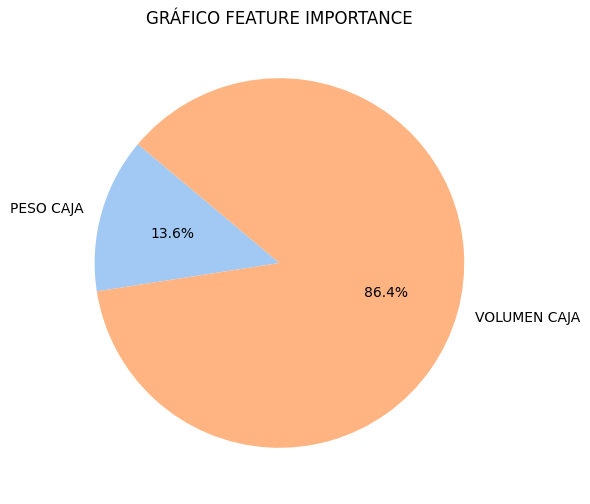

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(FI['Feature Importance'], labels=DSNX_7.columns[2:4], autopct='%1.1f%%', startangle=140)
plt.title('GRÁFICO FEATURE IMPORTANCE')

Según el modelo, el factor más determinante es el volumen de la caja.

Otro punto interesante a analizar es graficar las variables, para ver si hay alguna relación que salte a la vista.

<Axes: xlabel='PESO CAJA', ylabel='VOLUMEN CAJA'>

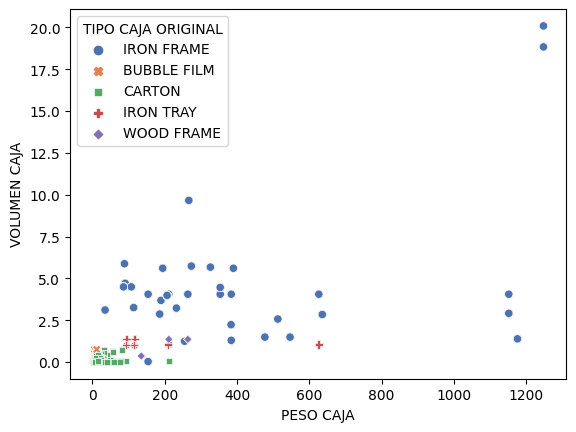

In [ ]:
sns.scatterplot(data=DSNX_7,x='PESO CAJA',y='VOLUMEN CAJA',hue='TIPO CAJA ORIGINAL',palette='deep',style='TIPO CAJA ORIGINAL')

A simple vista vemos:

Volumen bajo y Peso bajo/medio bajo - Cartón

Volumen medio bajo y Peso bajo - Bubble film

Volumen medio bajo y Peso medio bajo - Iron tray

Volumen medio bajo y Peso medio alto - Wood frame

El resto es Iron frame.

Aún así, tenemos algunos puntos "desubicados" en el diagrama. Veamos el árbol de decisión para entender esto mejor.

In [ ]:
label = ['BUBBLE FILM','CARTON','IRON FRAME','IRON TRAY','WOOD FRAME']
plt.figure(figsize=(240, 80))
plot_tree(modelo_arbol, feature_names=x_train.columns, class_names=label, impurity=False, filled=True, max_depth=4)
circulo = Circle((0.55, 0.25), 0.035, color='red', fill=False, linewidth=10)
plt.gca().add_patch(circulo)
plt.show()

Con el árbol a la vista podemos entender mejor cual es la lógica que utiliza el proveedor a la hora de seleccionar el packaging.

Llama la atención algunas decisiones que toman, como por ejemplo la marcada con el círculo rojo. Según el modelo, si la mercadería ocupa un volumen entre 1.05 y 1.147 m3, y además pesa más de 144.42kg, va en caja de cartón. Este peso es ridículo para un packaging de ese tipo, obviamente se va a terminar rompiendo.

Aquí tenemos solo un ejemplo de todas las mejoras que se podrían implementar estudiando mejor este diagrama.

###4.3.6 - Insights y conclusión

1) El modelo realmente funciona muy bien, las métricas dieron estupendo.

2) Podemos concluir entonces que, sabiendo el peso y volumen total de un pedido, podremos predecir de forma muy buena en qué tipo de packaging vendrá la mercadería.

3) Haber hecho el diagrama del árbol solo con las variables más relevantes y sin aplicar PCA, nos da la posibilidad de entender la lógica de elección de packaging del proveedor, y en función de eso recomendar mejoras.

#5 - Conexión a APIs de interés

## 5.1 - Estableciendo primeras conexiones

Ahora que ya contamos con un modelo predictivo que nos permite estimar el tipo de caja en función del pedido que tengamos que hacer al proveedor, indagaremos un poco en los costos.

Es de interés poder conocer aproximadamente qué costo tendrá el envío de la caja de reposición que se necesita, y para esto utilizaremos una API pública del proveedor Freightos.

Dicha API necesita que le digamos qué es lo que vamos a enviar, cuanto pesa, sus dimensiones, la cantidad y desde/hacia donde se dirige el envío. Una vez contemos con toda esta información, la misma se debe representar dentro de un URL con el formato correcto, y así se podrá hacer la consulta.

Fuente: https://ship.freightos.com/api/shippingCalculator

Veamos un ejemplo ilustrativo:

In [ ]:
loadtype = 'boxes' #Enviaremos una caja
weight = 200 #Peso en kg
width = 50 #Ancho en cm
length = 50 #Largo en cm
height = 50 #Altura en cm
origin = 'PVG' #El origen del envío será Shangai, el proveedor nos enviará el pedido desde allí
quantity = 1 #Cantidad a pedir
destination = 'JFK' #El destino puede ser, por ejemplo, Nueva York
url = 'https://ship.freightos.com/api/shippingCalculator?loadtype=' + loadtype + '&weight=' + str(weight) + '&width=' + str(width) + '&length=' + str(length) + '&height=' + str(height) + '&origin=' + origin + '&quantity=' + str(quantity) + '&destination=' + destination
url #Una vez se tienen todos los datos, se combinan como muestra la fila anterior, y así generamos el URL correcto para la consulta

'https://ship.freightos.com/api/shippingCalculator?loadtype=boxes&weight=200&width=50&length=50&height=50&origin=PVG&quantity=1&destination=JFK'

In [ ]:
response = requests.get(url) #Establecemos la conexión a la API con nuestro URL generado, si está todo OK dará 200
print(response.status_code)

200


In [ ]:
data = response.json() #A continuación veremos lo que la API devuelve
data

{'response': {'_comment': ["© Freightos Ltd, all rights reserved except those explicitly granted in the publicly posted Master Services Agreement.  Amongst other terms, any use requires clear acknowledgement of Freightos with a link to www.freightos.com. This API is in beta and strictly 'as-is' without warranty of any kind."],
  'estimatedFreightRates': {'mode': {'mode': 'air',
    'price': {'min': {'moneyAmount': {'amount': 1066, 'currency': 'USD'}},
     'max': {'moneyAmount': {'amount': 1382, 'currency': 'USD'}}},
    'transitTimes': {'unit': 'days', 'min': 1, 'max': 6}},
   'numQuotes': 1}}}

##5.2 - Primeras consultas

Como se pudo ver en la sección anterior, el json que devuelve la API nos trae información de:

1) Rango de costo que puede rondar el envío.

2) Rango de días que demoraría el envío en llegar.

A continuación, tomaremos un ejemplo de cada tipo de caja del DS original, y veremos que nos devuelve la API.

In [ ]:
DSNX_8 = DSNX[['TIPO CAJA','PESO CAJA','LARGO CAJA','ANCHO CAJA','ALTURA CAJA']] #Estas son las columnas del DS que me interesan para realizar la consulta
DSNX_8 = DSNX_8[(DSNX.index == 1716) | (DSNX.index == 3890) | (DSNX.index == 3891) | (DSNX.index == 4174) | (DSNX.index == 21632)] #Filtro un ejemplo de cada tipo de caja
DSNX_8 = DSNX_8.reset_index(drop=True) #Reinicio índice
DSNX_8

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA
0  BUBBLE FILM      10.00        1900          80           80
1    IRON TRAY     384.00        2050        1050          600
2   WOOD FRAME     134.92         920         920          420
3   IRON FRAME     273.60        2250        1820         1400
4       CARTON      12.00         400         380          300

In [ ]:
DIAS_VIAJE = dict() #Creo un diccionario vacío
for dest in ('JFK','BER'): #Haremos una consulta para enviar las cajas a Nueva York y otra para enviar a Berlín
  DSNX_8COPIA = DSNX_8.copy() #Una vez tengamos la info. de Nueva York, la guardamos en otra matriz y así los datos de Berlín no los sobreescriben
  destination = dest #Modifico el destino en cada iteración
  for i in DSNX_8.index: #Voy iterando por cada tipo de caja
    weight = DSNX_8.loc[i,'PESO CAJA'] #Peso caja en kg
    width = DSNX_8.loc[i,'ANCHO CAJA']/10 #Ancho caja pasado a cm
    length = DSNX_8.loc[i,'LARGO CAJA']/10 #Largo caja pasado a cm
    height = DSNX_8.loc[i,'ALTURA CAJA']/10 #Altura caja pasado a cm
    url = 'https://ship.freightos.com/api/shippingCalculator?loadtype=' + loadtype + '&weight=' + str(weight) + '&width=' + str(width) + '&length=' + str(length) + '&height=' + str(height) + '&origin=' + origin + '&quantity=' + str(quantity) + '&destination=' + destination
    ok_url = 0 #Aseguro que el programa entre al while
    while ok_url!=200: #Esto va a iterar hasta que la request devuelva 200
      response = requests.get(url)
      ok_url = response.status_code
    data = response.json() #Obtengo los datos del json y en los 2 rengones siguientes extraigo el costo y tiempo de viaje promedio
    DSNX_8.loc[i,'COSTO USD'] = (data['response']['estimatedFreightRates']['mode']['price']['min']['moneyAmount']['amount'] + data['response']['estimatedFreightRates']['mode']['price']['max']['moneyAmount']['amount']) / 2
    DSNX_8.loc[i,'DIAS VIAJE'] = (data['response']['estimatedFreightRates']['mode']['transitTimes']['min'] + data['response']['estimatedFreightRates']['mode']['transitTimes']['max']) / 2
    DSNX_8.loc[i,'DESTINO'] = dest #Anoto a qué destino está asociado el dato
  DIAS_VIAJE[dest] = DSNX_8['DIAS VIAJE'].mean() #Guardo en el diccionario creado cuantos días en promedio demora la caja en ir del origen al destino
DSNX_8 = pd.concat([DSNX_8COPIA, DSNX_8], axis=0) #Fusiono las dos matrices (NY + Berlín)
DSNX_8 = DSNX_8.reset_index(drop=True) #Reinicio el índice
DSNX_8

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  COSTO USD  \
0  BUBBLE FILM      10.00        1900          80           80    399.750   
1    IRON TRAY     384.00        2050        1050          600   2413.660   
2   WOOD FRAME     134.92         920         920          420    859.440   
3   IRON FRAME     273.60        2250        1820         1400   5900.655   
4       CARTON      12.00         400         380          300    353.500   
5  BUBBLE FILM      10.00        1900          80           80     90.900   
6    IRON TRAY     384.00        2050        1050          600   1559.040   
7   WOOD FRAME     134.92         920         920          420    558.570   
8   IRON FRAME     273.60        2250        1820         1400   3686.300   
9       CARTON      12.00         400         380          300    109.080   

   DIAS VIAJE DESTINO  
0         3.5     JFK  
1         3.5     JFK  
2         3.5     JFK  
3         3.5     JFK  
4         3.5     JFK  
5         7.0     BER  
6         8.0     BER  
7         8.0     BER  
8         8.0     BER  
9         7.0     BER

Como resultado agregamos las columna con el costo del envío, los días promedio de viaje y el destino al cual se enviará la caja.

Grafiquemos los costos para verlo mejor, los días de viaje dependen más bien del destino, no del tipo de caja.

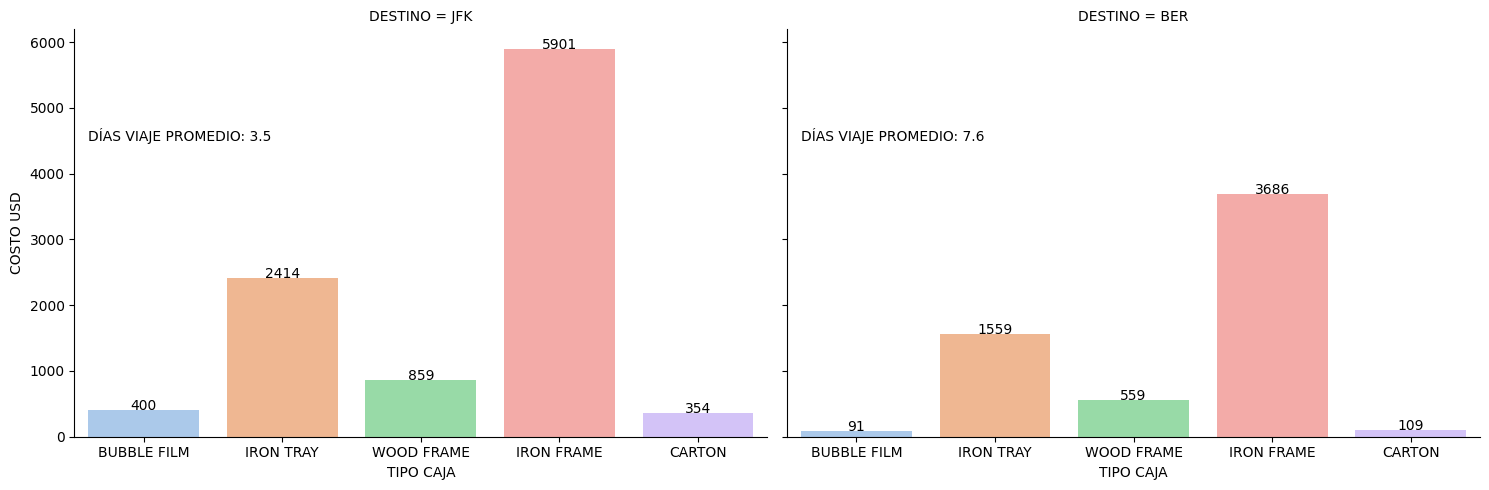

In [ ]:
g = sns.catplot(data=DSNX_8,kind='bar',y='COSTO USD',x='TIPO CAJA',col='DESTINO',height=5,aspect=1.5)
for i,ax in enumerate(g.axes.flat):
  if i==1:
    ax.annotate('DÍAS VIAJE PROMEDIO: ' + str(DIAS_VIAJE['BER']), xy=(-0.4, 4500), xytext=(-0.4, 4500)) #Acá usamos el dato del diccionario creado anteriormente
  else:
    ax.annotate('DÍAS VIAJE PROMEDIO: ' + str(DIAS_VIAJE['JFK']), xy=(-0.4, 4500), xytext=(-0.4, 4500)) #Acá usamos el dato del diccionario creado anteriormente
  for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}', ha='center')

In [ ]:
DSNX_8 = DSNX[['TIPO CAJA','PESO CAJA','VOLUMEN CAJA']] #Traigo datos para comparar con el gráfico
DSNX_8 = DSNX_8[(DSNX.index == 1716) | (DSNX.index == 3890) | (DSNX.index == 3891) | (DSNX.index == 4174) | (DSNX.index == 21632)]
DSNX_8 = DSNX_8.reset_index(drop=True)
DSNX_8

TIPO CAJA  PESO CAJA  VOLUMEN CAJA
0  BUBBLE FILM      10.00      0.012160
1    IRON TRAY     384.00      1.291500
2   WOOD FRAME     134.92      0.355488
3   IRON FRAME     273.60      5.733000
4       CARTON      12.00      0.022800

Sorprende ver que tenemos más demora en enviar a Berlín que a Nueva York (y en general sale más barato).

En cuanto a los costos, el orden de cual es el más caro se mantiene para ambos destinos. A su vez, este orden se corresponde con el volumen, no con el peso (lo cual sorprende también, ya que en general los couriers cobran por peso, no por volumen).

##5.3 - Extracción masiva de datos

###5.3.1 - Selección y preparación de columnas relevantes

In [ ]:
DSNX_9 = DSNX[['TIPO CAJA','PESO CAJA','LARGO CAJA','ANCHO CAJA','ALTURA CAJA']] #Estas son las columnas del DS que me interesan para realizar la consulta
DSNX_9

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA
0      IRON FRAME     153.92        1700         100          130
1      IRON FRAME     153.92        1700         100          130
2      IRON FRAME     153.92        1700         100          130
3      IRON FRAME     153.92        1700         100          130
4      IRON FRAME     153.92        1700         100          130
...           ...        ...         ...         ...          ...
23096      CARTON      15.05         500         500          250
23097      CARTON      15.05         500         500          250
23098      CARTON      15.05         500         500          250
23099      CARTON      15.05         500         500          250
23100      CARTON      15.05         500         500          250

[23101 rows x 5 columns]

In [ ]:
DSNX_9 = DSNX_9.drop_duplicates() #Borro cajas duplicadas
DSNX_9 = DSNX_9.reset_index(drop=True) #Reinicio índice
DSNX_9

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA
0     IRON FRAME     153.92        1700         100          130
1     IRON FRAME    1176.00        1700         650         1250
2     IRON FRAME     636.00        2250        1400          900
3     IRON FRAME    1248.00        2250        5200         1610
4     IRON FRAME     513.00        2250        1900          600
...          ...        ...         ...         ...          ...
1193      CARTON      23.43         360         300          180
1194      CARTON      17.72         400         300          200
1195      CARTON      15.02         280         200          150
1196      CARTON      18.52         280         200          150
1197      CARTON      39.83         410         310          210

[1198 rows x 5 columns]

In [ ]:
DSNX_9['LARGO CAJA'] = DSNX_9['LARGO CAJA'].div(10) #Paso a cm las 3 columnas
DSNX_9['ANCHO CAJA'] = DSNX_9['ANCHO CAJA'].div(10)
DSNX_9['ALTURA CAJA'] = DSNX_9['ALTURA CAJA'].div(10)

In [ ]:
DSNX_9['VOLUMEN CAJA'] = DSNX_9['LARGO CAJA'].div(100) * DSNX_9['ANCHO CAJA'].div(100) * DSNX_9['ALTURA CAJA'].div(100) #Calculamos el volumen en m3
DSNX_9

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  VOLUMEN CAJA
0     IRON FRAME     153.92       170.0        10.0         13.0      0.022100
1     IRON FRAME    1176.00       170.0        65.0        125.0      1.381250
2     IRON FRAME     636.00       225.0       140.0         90.0      2.835000
3     IRON FRAME    1248.00       225.0       520.0        161.0     18.837000
4     IRON FRAME     513.00       225.0       190.0         60.0      2.565000
...          ...        ...         ...         ...          ...           ...
1193      CARTON      23.43        36.0        30.0         18.0      0.019440
1194      CARTON      17.72        40.0        30.0         20.0      0.024000
1195      CARTON      15.02        28.0        20.0         15.0      0.008400
1196      CARTON      18.52        28.0        20.0         15.0      0.008400
1197      CARTON      39.83        41.0        31.0         21.0      0.026691

[1198 rows x 6 columns]

###5.3.2 - Análisis univariado (general)

In [ ]:
stats.describe(DSNX_9['PESO CAJA']) #Saco estadísticos

DescribeResult(nobs=1198, minmax=(0.32, 1248.0), mean=27.754624373956595, variance=10055.813345514594, skewness=9.01702010044304, kurtosis=93.49878259797866)

<ipython-input-116-389305c0ef5b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DSNX_9['PESO CAJA'],bins=20) #Acá lo compruebo


<Axes: xlabel='PESO CAJA', ylabel='Density'>

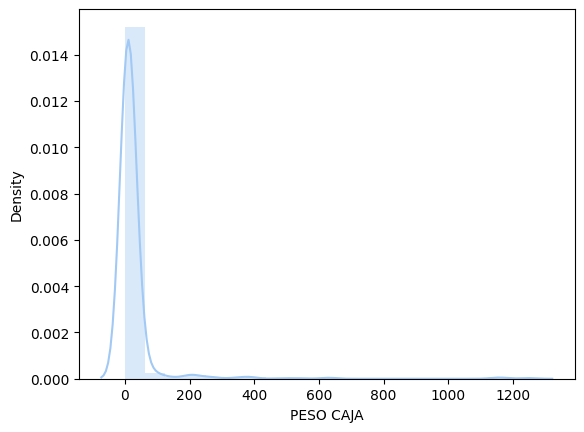

In [ ]:
sns.distplot(DSNX_9['PESO CAJA'],bins=20) #Acá lo compruebo

In [ ]:
stats.describe(DSNX_9['VOLUMEN CAJA']) #Saco estadísticos

DescribeResult(nobs=1198, minmax=(0.007000000000000001, 20.092800000000004), mean=0.23406879465776295, variance=1.1639235434701674, skewness=11.506298409957767, kurtosis=177.77257530440798)

<ipython-input-118-e5b5e86e4902>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DSNX_9['VOLUMEN CAJA'],bins=20) #Acá lo compruebo


<Axes: xlabel='VOLUMEN CAJA', ylabel='Density'>

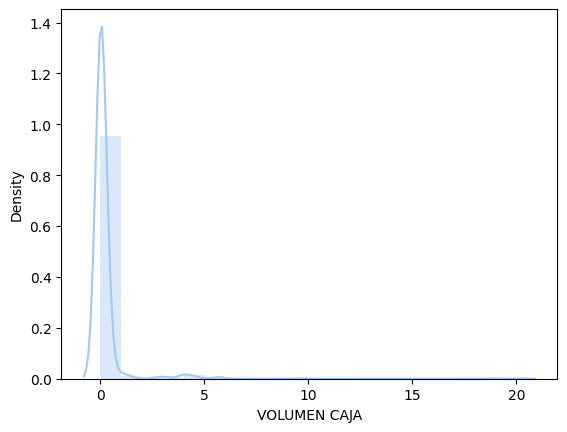

In [ ]:
sns.distplot(DSNX_9['VOLUMEN CAJA'],bins=20) #Acá lo compruebo

Tanto para el peso como para el volumen, sucede que tenemos gran concentración de datos en determinada parte del gráfico, y luego hay excepciones con valores bastante más grandes. Los valores de skewness lo comprueban, sabemos que para que una distribución sea simétrica debe estar en +-0.5, y tenemos valores fuera de ese rango.

En cuanto a la kurtosis, tenemos valores mayores a 3, lo que demuestra que ambas campanas son bastante altas y finas, con poca varianza (si no tuviéramos esos valores que provocan la asimetría).

###5.3.3 - Análisis univariado (por tipo de caja)

Ahora hilemos un poco más profundo, revisemos nuevamente las variables pero diferenciando por tipo de caja.

In [ ]:
DSNX_9.groupby('TIPO CAJA')['PESO CAJA','LARGO CAJA','ANCHO CAJA','ALTURA CAJA','VOLUMEN CAJA'].mean() #Veamos el promedio para tener una idea de cada tipo de caja

<ipython-input-119-29fce5a4ce14>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DSNX_9.groupby('TIPO CAJA')['PESO CAJA','LARGO CAJA','ANCHO CAJA','ALTURA CAJA','VOLUMEN CAJA'].mean() #Veamos el promedio para tener una idea de cada tipo de caja


PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  VOLUMEN CAJA
TIPO CAJA                                                                 
BUBBLE FILM    7.281373  133.431373   46.803922    20.921569      0.123364
CARTON        13.107140   55.042805   34.944444    25.616120      0.071587
IRON FRAME   407.424722  230.555556  169.277778   111.694444      4.813988
IRON TRAY    333.160000  197.222222  112.666667    74.333333      1.678375
WOOD FRAME   205.330000  161.750000  118.000000    76.500000      1.777872

Como se puede apreciar, las cajas CARTON y las BUBBLE FILM son las menos pesadas. En cuanto a dimensiones, las BUBBLE FILM son largas y finas en comparación con las CARTON. Ambas dos también son las menos voluminosas.

En cuanto al resto, a este nivel de análisis no hay grandes hallazgos en cuanto a dimensiones, sí sabemos que las IRON FRAME son las más pesadas superando las IRON TRAY por 100kg, y éstas últimas superan por lo mismo a las WOOD FRAME. Con respecto al volumen, las IRON TRAY y WOOD FRAME son similares, superadas por las IRON FRAME.

Grafiquemos para ver un poco mejor estos datos.

<Axes: xlabel='PESO CAJA', ylabel='TIPO CAJA'>

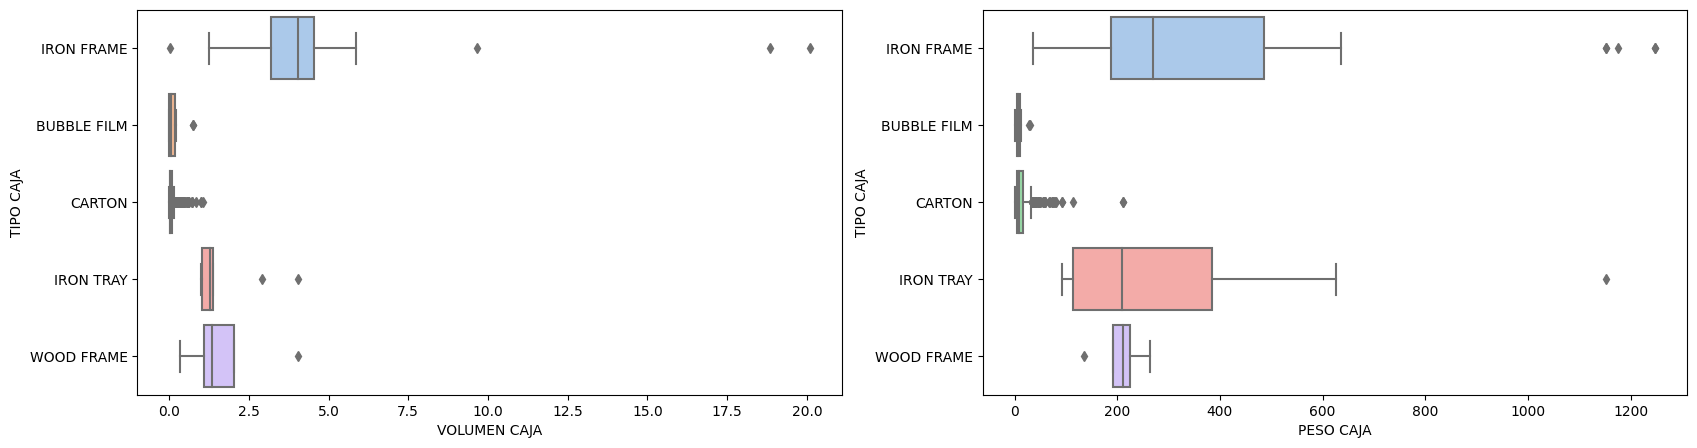

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(data=DSNX_9, x='VOLUMEN CAJA', y='TIPO CAJA', ax=axs[0])
sns.boxplot(data=DSNX_9, x='PESO CAJA', y='TIPO CAJA', ax=axs[1])

Este gráfico nos da una idea más visual del volumen y peso de cada tipo de caja.

Como ya habíamos observado, las de tipo CARTON y BUBBLE FILM conllevan poco volumen y peso.

Las WOOD FRAME son bastante consistentes en ambas medidas, similares a las IRON TRAY en volumen (incluso superándolas en algunas observaciones).

Las IRON TRAY son consistentes en volumen, pero tienen un rango más abarcativo de pesos, llegando a competir con las IRON TRAY e incluso pudiendo ser más livianas que las WOOD FRAME.

Finalmente, las IRON FRAME son bastante abarcativas en ambas medidas, aunque en peso suelen superar a todas las demás. En cuanto a volumen, algunas observaciones pueden ir desde ser similar a las WOOD FRAME hasta superar ampliamente las IRON TRAY.

Habiendo analizado peso y volumen, profundicemos un poco más en las dimensiones.

In [ ]:
DSNX_9G = DSNX_9.drop(['PESO CAJA','VOLUMEN CAJA'], axis=1) #Elimino ambas columnas ya que no las necesitaré para esta parte
DSNX_9G = pd.melt(DSNX_9G, 'TIPO CAJA', var_name='MEDIDA') #Realizo un melt para modificar el DF a como me sirve
DSNX_9G = DSNX_9G.rename(columns={'value': 'Medida en cm'}) #Renombro la columna nueva
DSNX_9G

TIPO CAJA       MEDIDA  Medida en cm
0     IRON FRAME   LARGO CAJA         170.0
1     IRON FRAME   LARGO CAJA         170.0
2     IRON FRAME   LARGO CAJA         225.0
3     IRON FRAME   LARGO CAJA         225.0
4     IRON FRAME   LARGO CAJA         225.0
...          ...          ...           ...
3589      CARTON  ALTURA CAJA          18.0
3590      CARTON  ALTURA CAJA          20.0
3591      CARTON  ALTURA CAJA          15.0
3592      CARTON  ALTURA CAJA          15.0
3593      CARTON  ALTURA CAJA          21.0

[3594 rows x 3 columns]

<Axes: xlabel='Medida en cm', ylabel='TIPO CAJA'>

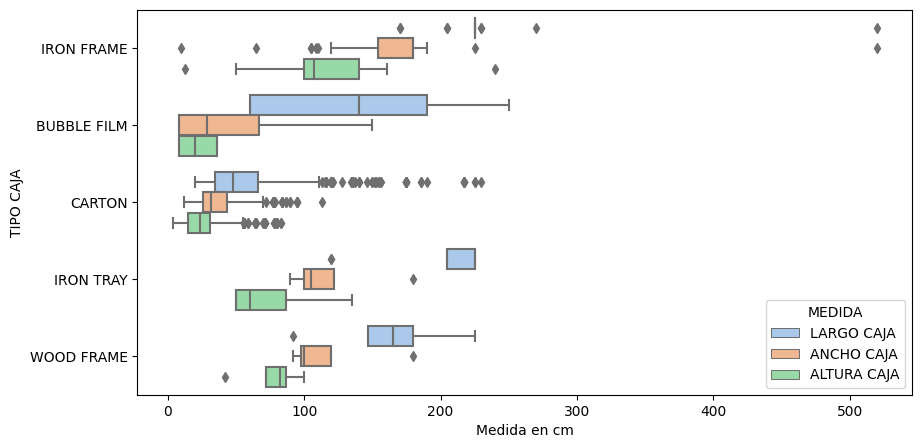

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(data=DSNX_9G, x='Medida en cm', y='TIPO CAJA', hue='MEDIDA', dodge=True, ax=ax)

Es interesante observar que, para toda caja, se cumple la relación LARGO > ANCHO > ALTURA. Por otra parte, también podemos identificar tres grupos:

1) Las cajas de tipo CARTON son bastante similares a un cubo, no hay grandes diferencias entre sus dimensiones.

2) Las cajas de tipo WOOD FRAME-IRON TRAY-IRON FRAME son similares en altura y ancho, teniendo siempre un largo moderadamente mayor al resto de las dimensiones.

3) Las cajas de tipo BUBBLE FILM tienen un largo ámpliamente mayor a las otras dimensiones, son como un "caño".

Finalmente, intentemos resumir todo lo visto en un solo gráfico.

In [ ]:
DSNX_9G = pd.melt(DSNX_9, 'TIPO CAJA', var_name='MEDIDA') #Realizo un melt para modificar el DF a como me sirve
DSNX_9G

TIPO CAJA        MEDIDA        value
0     IRON FRAME     PESO CAJA   153.920000
1     IRON FRAME     PESO CAJA  1176.000000
2     IRON FRAME     PESO CAJA   636.000000
3     IRON FRAME     PESO CAJA  1248.000000
4     IRON FRAME     PESO CAJA   513.000000
...          ...           ...          ...
5985      CARTON  VOLUMEN CAJA     0.019440
5986      CARTON  VOLUMEN CAJA     0.024000
5987      CARTON  VOLUMEN CAJA     0.008400
5988      CARTON  VOLUMEN CAJA     0.008400
5989      CARTON  VOLUMEN CAJA     0.026691

[5990 rows x 3 columns]

<Axes: xlabel='value', ylabel='MEDIDA'>

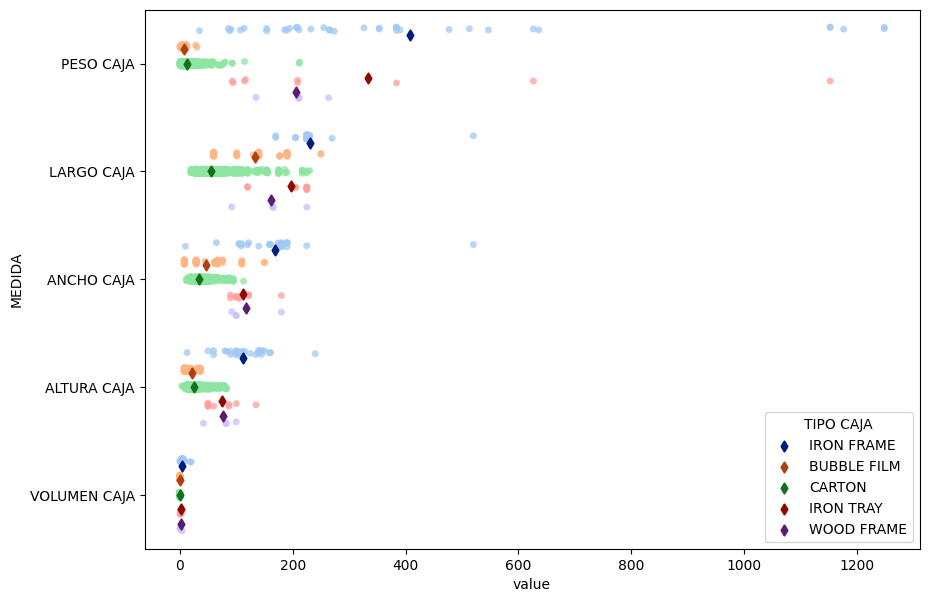

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.stripplot(data=DSNX_9G, x='value', y='MEDIDA', hue='TIPO CAJA', dodge=True, alpha=.75, zorder=1, legend=False, ax=ax)
sns.pointplot(data=DSNX_9G, x='value', y='MEDIDA', hue='TIPO CAJA', join=False, dodge=.8 - .8 / 3, palette="dark", markers="d", scale=.75, errorbar=None, ax=ax)

En este gráfico podemos observar la disperción para cada medida, diferenciando por tipo de caja. A su vez, se marca en oscuro el promedio.

En volumen no hay prácticamente disperción, y en el peso si que la hay. En el resto de las medidas, la disperción es moderada.

###5.3.4 - Consulta masiva a API + Data wrangling

Ahora que tenemos bien analizadas las variables de interés, es momento de utilizar masivamente la API para entender más sobre los costos de transporte. Haremos una consulta a la API por cada fila del DF (aprox. 1200 consultas).

In [ ]:
ACTUALIZAR_API = False #Hacer la consulta para todas las cajas del DF lleva más de una hora, con este parámetro defino si quiero hacerlo o no

In [ ]:
if ACTUALIZAR_API == True: #En el caso de que quiera realizar la consulta, se ejecuta
  destination = 'JFK' #Defino el destino, utilizaremos Nueva York como ejemplo
  for i in DSNX_9.index: #Voy iterando por cada caja
    weight = DSNX_9.loc[i,'PESO CAJA'] #Peso caja en kg
    width = DSNX_9.loc[i,'ANCHO CAJA'] #Ancho caja en cm
    length = DSNX_9.loc[i,'LARGO CAJA'] #Largo caja en cm
    height = DSNX_9.loc[i,'ALTURA CAJA'] #Altura caja en cm
    url = 'https://ship.freightos.com/api/shippingCalculator?loadtype=' + loadtype + '&weight=' + str(weight) + '&width=' + str(width) + '&length=' + str(length) + '&height=' + str(height) + '&origin=' + origin + '&quantity=' + str(quantity) + '&destination=' + destination
    ok_url = 0 #Aseguro que el programa entre al while
    while ok_url!=200: #Esto va a iterar hasta que la request devuelva 200
      response = requests.get(url)
      ok_url = response.status_code
    data = response.json() #Obtengo los datos del json y en los 2 rengones siguientes extraigo el costo y tiempo de viaje promedio
    try: #Hago un try/except porque a veces puede pasar que la API no tiene datos para los inputs que le doy
      DSNX_9.loc[i,'COSTO USD'] = (data['response']['estimatedFreightRates']['mode']['price']['min']['moneyAmount']['amount'] + data['response']['estimatedFreightRates']['mode']['price']['max']['moneyAmount']['amount']) / 2
      DSNX_9.loc[i,'DIAS VIAJE'] = (data['response']['estimatedFreightRates']['mode']['transitTimes']['min'] + data['response']['estimatedFreightRates']['mode']['transitTimes']['max']) / 2
      print(i, 'ok', url) #Voy printeando el i para saber por donde va, un ok/fail para ver si va fallando mucho o no, y el url para saber qué devuelve la API
    except:
      DSNX_9.loc[i,'COSTO USD'] = np.nan #En el caso de que la API falle, me devuelve NaN
      DSNX_9.loc[i,'DIAS VIAJE'] = np.nan
      print(i, 'fail', url)
  DSNX_9.to_excel('DatosAPI.xlsx', index=False) #Al terminar, guardo los datos en un Excel
else:
  DSNX_9 = pd.read_excel('DatosAPI.xlsx') #Si no quiero realizar la consulta, tomo los datos del último Excel que había generado
DSNX_9

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  \
0     IRON FRAME     153.92         170        10.0         13.0   
1     IRON FRAME    1176.00         170        65.0        125.0   
2     IRON FRAME     636.00         225       140.0         90.0   
3     IRON FRAME    1248.00         225       520.0        161.0   
4     IRON FRAME     513.00         225       190.0         60.0   
...          ...        ...         ...         ...          ...   
1193      CARTON      23.43          36        30.0         18.0   
1194      CARTON      17.72          40        30.0         20.0   
1195      CARTON      15.02          28        20.0         15.0   
1196      CARTON      18.52          28        20.0         15.0   
1197      CARTON      39.83          41        31.0         21.0   

      VOLUMEN CAJA  COSTO USD  DIAS VIAJE  
0         0.022100     819.97         4.0  
1         1.381250    5856.48         4.0  
2         2.835000    3273.12        10.5  
3        18.837000        NaN         NaN  
4         2.565000    2656.71        10.5  
...            ...        ...         ...  
1193      0.019440     357.84         4.0  
1194      0.024000     353.50         4.0  
1195      0.008400     353.50         4.0  
1196      0.008400     353.50         4.0  
1197      0.026691     524.40         4.0  

[1198 rows x 8 columns]

In [ ]:
DSNX_9.info() #Tenemos un par de nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIPO CAJA     1198 non-null   object 
 1   PESO CAJA     1198 non-null   float64
 2   LARGO CAJA    1198 non-null   int64  
 3   ANCHO CAJA    1198 non-null   float64
 4   ALTURA CAJA   1198 non-null   float64
 5   VOLUMEN CAJA  1198 non-null   float64
 6   COSTO USD     1196 non-null   float64
 7   DIAS VIAJE    1196 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 75.0+ KB


In [ ]:
DSNX_9[DSNX_9['COSTO USD'].isnull()] #Los nulos son éstos, tengo la idea de que el problema estuvo en que el peso es demasiado

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  VOLUMEN CAJA  \
3    IRON FRAME     1248.0         225       520.0        161.0       18.8370   
654  IRON FRAME     1248.0         520       161.0        240.0       20.0928   

     COSTO USD  DIAS VIAJE  
3          NaN         NaN  
654        NaN         NaN

In [ ]:
DSNX_9.sort_values('PESO CAJA',ascending=False) #Reordeno los valores por peso, efectivamente vemos que son las cajas más pesadas, se ve que la API no puede calcular con esos parámetros

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  \
654    IRON FRAME    1248.00         520       161.0        240.0   
3      IRON FRAME    1248.00         225       520.0        161.0   
1      IRON FRAME    1176.00         170        65.0        125.0   
963    IRON FRAME    1152.00         225       180.0        100.0   
576     IRON TRAY    1152.00         205       105.0        135.0   
...           ...        ...         ...         ...          ...   
1029       CARTON       0.54          35        25.0         20.0   
306        CARTON       0.54          30        20.0         17.0   
497   BUBBLE FILM       0.53          60        29.0         36.0   
307        CARTON       0.51          28        20.0         15.0   
718        CARTON       0.32          28        20.0         15.0   

      VOLUMEN CAJA  COSTO USD  DIAS VIAJE  
654      20.092800        NaN         NaN  
3        18.837000        NaN         NaN  
1         1.381250   5856.480         4.0  
963       4.050000   5928.615         4.0  
576       2.905875   5839.425         4.0  
...            ...        ...         ...  
1029      0.017500    315.100         4.0  
306       0.010200    307.575         4.0  
497       0.062640    345.350         4.0  
307       0.008400    307.575         4.0  
718       0.008400    307.575         4.0  

[1198 rows x 8 columns]

In [ ]:
DSNX_9 = DSNX_9.dropna(subset='COSTO USD') #Elimino esos nulos, ya que no serán de utilidad para realizar análisis si no tenemos el valor de costo. Además, pertenecen a casos excepcionales de cajas muy pesadas
DSNX_9 = DSNX_9.reset_index(drop=True) #Reinicio índice
DSNX_9

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  \
0     IRON FRAME     153.92         170        10.0         13.0   
1     IRON FRAME    1176.00         170        65.0        125.0   
2     IRON FRAME     636.00         225       140.0         90.0   
3     IRON FRAME     513.00         225       190.0         60.0   
4     IRON FRAME      90.61         225       190.0        110.0   
...          ...        ...         ...         ...          ...   
1191      CARTON      23.43          36        30.0         18.0   
1192      CARTON      17.72          40        30.0         20.0   
1193      CARTON      15.02          28        20.0         15.0   
1194      CARTON      18.52          28        20.0         15.0   
1195      CARTON      39.83          41        31.0         21.0   

      VOLUMEN CAJA  COSTO USD  DIAS VIAJE  
0         0.022100     819.97         4.0  
1         1.381250    5856.48         4.0  
2         2.835000    3273.12        10.5  
3         2.565000    2656.71        10.5  
4         4.702500    4122.42         4.0  
...            ...        ...         ...  
1191      0.019440     357.84         4.0  
1192      0.024000     353.50         4.0  
1193      0.008400     353.50         4.0  
1194      0.008400     353.50         4.0  
1195      0.026691     524.40         4.0  

[1196 rows x 8 columns]

In [ ]:
DSNX_9.info() #Ahora si, no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIPO CAJA     1196 non-null   object 
 1   PESO CAJA     1196 non-null   float64
 2   LARGO CAJA    1196 non-null   int64  
 3   ANCHO CAJA    1196 non-null   float64
 4   ALTURA CAJA   1196 non-null   float64
 5   VOLUMEN CAJA  1196 non-null   float64
 6   COSTO USD     1196 non-null   float64
 7   DIAS VIAJE    1196 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 74.9+ KB


###5.3.5 - Análisis bivariado/multivariado

Ahora que tenemos el DF listo para analizar, realicemos algunos gráficos.

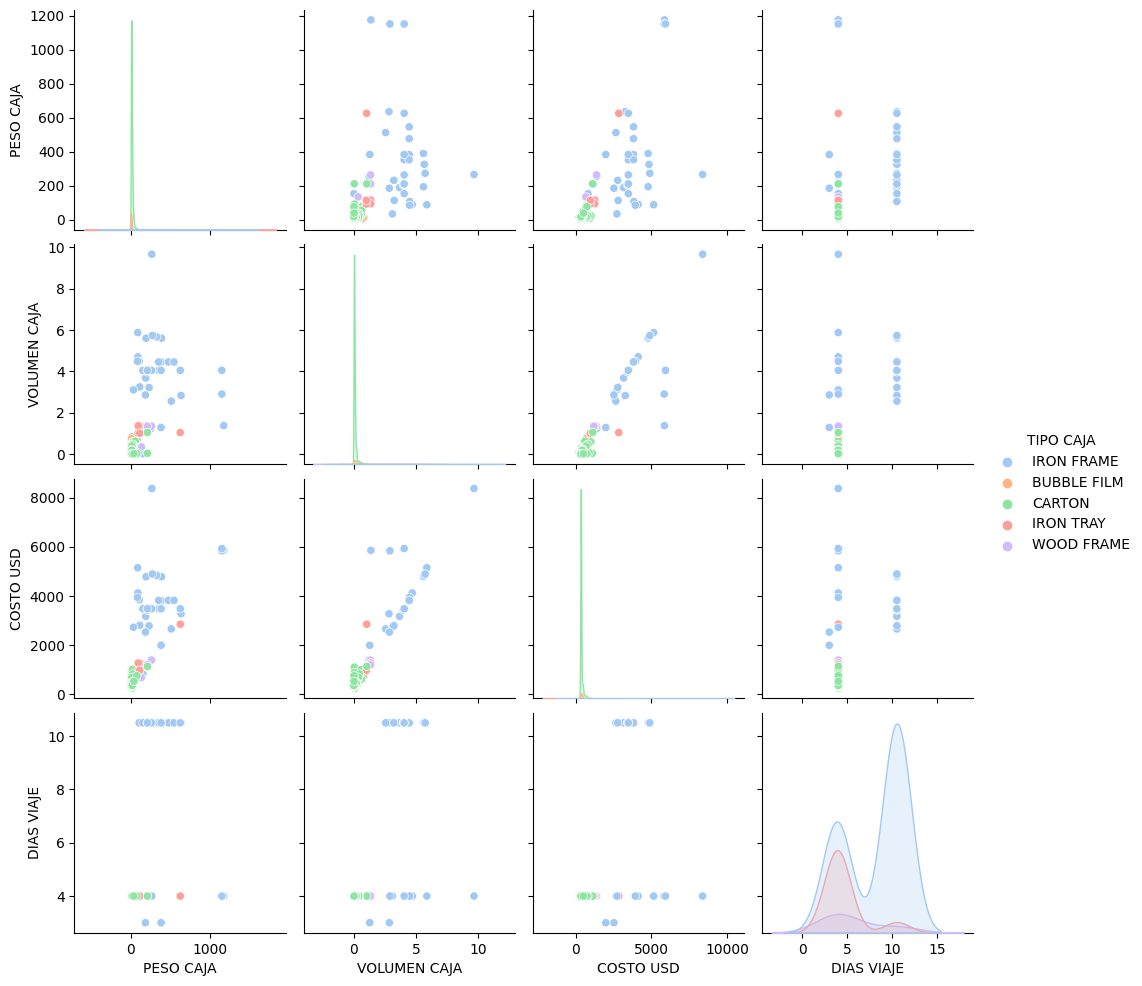

In [ ]:
DSNX_9G = DSNX_9.drop(['LARGO CAJA','ANCHO CAJA','ALTURA CAJA'], axis=1) #Saco algunas columnas que no me interesan
sns.pairplot(DSNX_9G, hue='TIPO CAJA') #Grafico

Mirando este primer conjunto de gráficos sacamos dos ideas importantes:

1. El volumen y el costo del viaje casi tienen una relación lineal.
2. El volumen y el peso permiten ver los tipos de caja agrupados en conjuntos bastante bien diferenciados, esto confirma que ambas variables son muy buenas para predecir el tipo de caja, como vimos en secciones anteriores.

Estudiemos en profundidad el punto 1.

In [ ]:
DSNX_9G = pd.melt(DSNX_9, ['TIPO CAJA','PESO CAJA','LARGO CAJA','ANCHO CAJA','ALTURA CAJA','VOLUMEN CAJA'], var_name='DATO API') #Realizo un melt para modificar el DF a como me sirve
DSNX_9G

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  \
0     IRON FRAME     153.92         170        10.0         13.0   
1     IRON FRAME    1176.00         170        65.0        125.0   
2     IRON FRAME     636.00         225       140.0         90.0   
3     IRON FRAME     513.00         225       190.0         60.0   
4     IRON FRAME      90.61         225       190.0        110.0   
...          ...        ...         ...         ...          ...   
2387      CARTON      23.43          36        30.0         18.0   
2388      CARTON      17.72          40        30.0         20.0   
2389      CARTON      15.02          28        20.0         15.0   
2390      CARTON      18.52          28        20.0         15.0   
2391      CARTON      39.83          41        31.0         21.0   

      VOLUMEN CAJA    DATO API    value  
0         0.022100   COSTO USD   819.97  
1         1.381250   COSTO USD  5856.48  
2         2.835000   COSTO USD  3273.12  
3         2.565000   COSTO USD  2656.71  
4         4.702500   COSTO USD  4122.42  
...            ...         ...      ...  
2387      0.019440  DIAS VIAJE     4.00  
2388      0.024000  DIAS VIAJE     4.00  
2389      0.008400  DIAS VIAJE     4.00  
2390      0.008400  DIAS VIAJE     4.00  
2391      0.026691  DIAS VIAJE     4.00  

[2392 rows x 8 columns]

(0.0, 12.0)

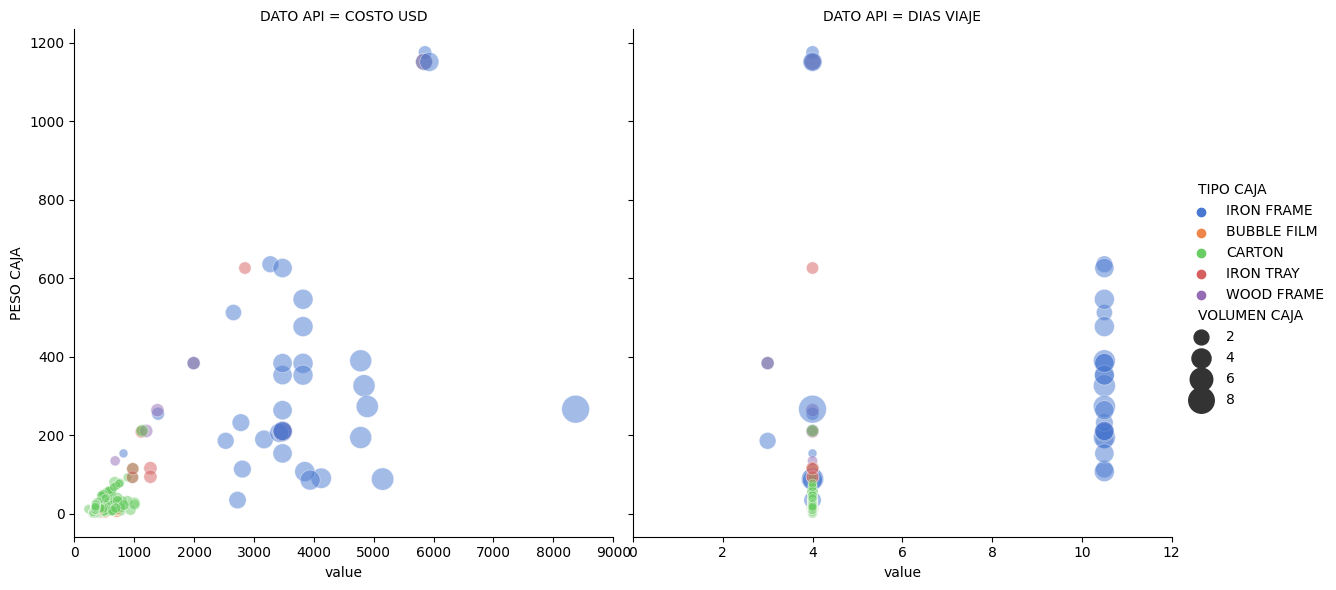

In [ ]:
g = sns.relplot(x='value', y='PESO CAJA', hue='TIPO CAJA', size='VOLUMEN CAJA', col='DATO API', sizes=(40, 400), alpha=.5, palette="muted", height=6, data=DSNX_9G, facet_kws=dict(sharex=False))
g.axes[0,0].set_xlim(0,9000)
g.axes[0,1].set_xlim(0,12)

Estos gráficos nos dan una idea de cómo se comportan los costos y los días de viaje, en función del volumen y el peso de cada caja. A su vez, podemos identificar el tipo de caja por colores.

En cuanto al costo, claramente aumenta a más peso o volumen. Aunque, cómo habíamos previsto en las primeras consultas de la API y en el gráfico anterior, el volumen es mucho más contundente a la hora de definir el costo.

Para los días de viaje, a priori no parece que el peso tenga un gran impacto. El volumen sí marca alguna tendencia, pero también tenemos excepciones.

Veamos un gráfico más como resumen de todo esto.

<ipython-input-135-49219aa1aa33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DSNX_9.corr(), cmap='rocket_r', annot=True) #Acá veo el mapa de calor


<Axes: >

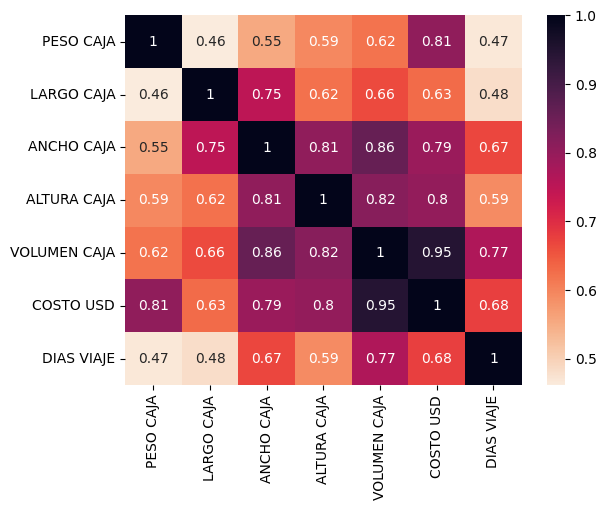

In [ ]:
sns.heatmap(DSNX_9.corr(), cmap='rocket_r', annot=True) #Acá veo el mapa de calor

Mirando la matriz de correlación, verificamos lo explicado anteriormente. El volumen tiene más importancia que el peso a la hora de definir los costos y días de viaje.

Intentemos ver estas relaciones desde otras perspectivas, dejando de lado el tipo de caja.

In [ ]:
pca_obj = PCA() #Aplico PCA para unificar peso, largo, ancho y altura en una sola variable
DSNX_9G = pd.DataFrame(pca_obj.fit_transform(DSNX_9.iloc[:,1:5]))
DSNX_9G

0           1          2          3
0      142.186505  -25.983037  87.909037   7.526747
1     1107.049792  331.765683  82.524508  42.771961
2      638.940735   56.457252  21.923778 -10.909791
3      531.944289   -3.664786  -9.687615 -60.576892
4      151.571949 -174.990443 -74.243558  -8.516884
...           ...         ...        ...        ...
1191   -14.442038   28.155410  -0.389724  -4.659177
1192   -18.150553   22.271682  -0.182679  -2.612255
1193   -27.102520   35.583576   4.094094  -1.802952
1194   -23.891463   36.936273   4.412315  -1.892710
1195     2.790903   29.468229   1.025206  -2.853569

[1196 rows x 4 columns]

In [ ]:
pca_obj.explained_variance_ratio_ #Veo que con la primer columna tengo el 79% de la info.

array([0.7927738 , 0.16928428, 0.0296173 , 0.00832462])

In [ ]:
DSNX_9 = pd.concat([DSNX_9, DSNX_9G[0]], axis=1) #Agregemos al DF la columna conseguida con PCA
DSNX_9 = DSNX_9.rename(columns={0: 'PCA'}) #Cambio de nombre a la columna
DSNX_9

TIPO CAJA  PESO CAJA  LARGO CAJA  ANCHO CAJA  ALTURA CAJA  \
0     IRON FRAME     153.92         170        10.0         13.0   
1     IRON FRAME    1176.00         170        65.0        125.0   
2     IRON FRAME     636.00         225       140.0         90.0   
3     IRON FRAME     513.00         225       190.0         60.0   
4     IRON FRAME      90.61         225       190.0        110.0   
...          ...        ...         ...         ...          ...   
1191      CARTON      23.43          36        30.0         18.0   
1192      CARTON      17.72          40        30.0         20.0   
1193      CARTON      15.02          28        20.0         15.0   
1194      CARTON      18.52          28        20.0         15.0   
1195      CARTON      39.83          41        31.0         21.0   

      VOLUMEN CAJA  COSTO USD  DIAS VIAJE          PCA  
0         0.022100     819.97         4.0   142.186505  
1         1.381250    5856.48         4.0  1107.049792  
2         2.835000    3273.12        10.5   638.940735  
3         2.565000    2656.71        10.5   531.944289  
4         4.702500    4122.42         4.0   151.571949  
...            ...        ...         ...          ...  
1191      0.019440     357.84         4.0   -14.442038  
1192      0.024000     353.50         4.0   -18.150553  
1193      0.008400     353.50         4.0   -27.102520  
1194      0.008400     353.50         4.0   -23.891463  
1195      0.026691     524.40         4.0     2.790903  

[1196 rows x 9 columns]

<Axes: xlabel='ALTURA CAJA', ylabel='COSTO USD'>

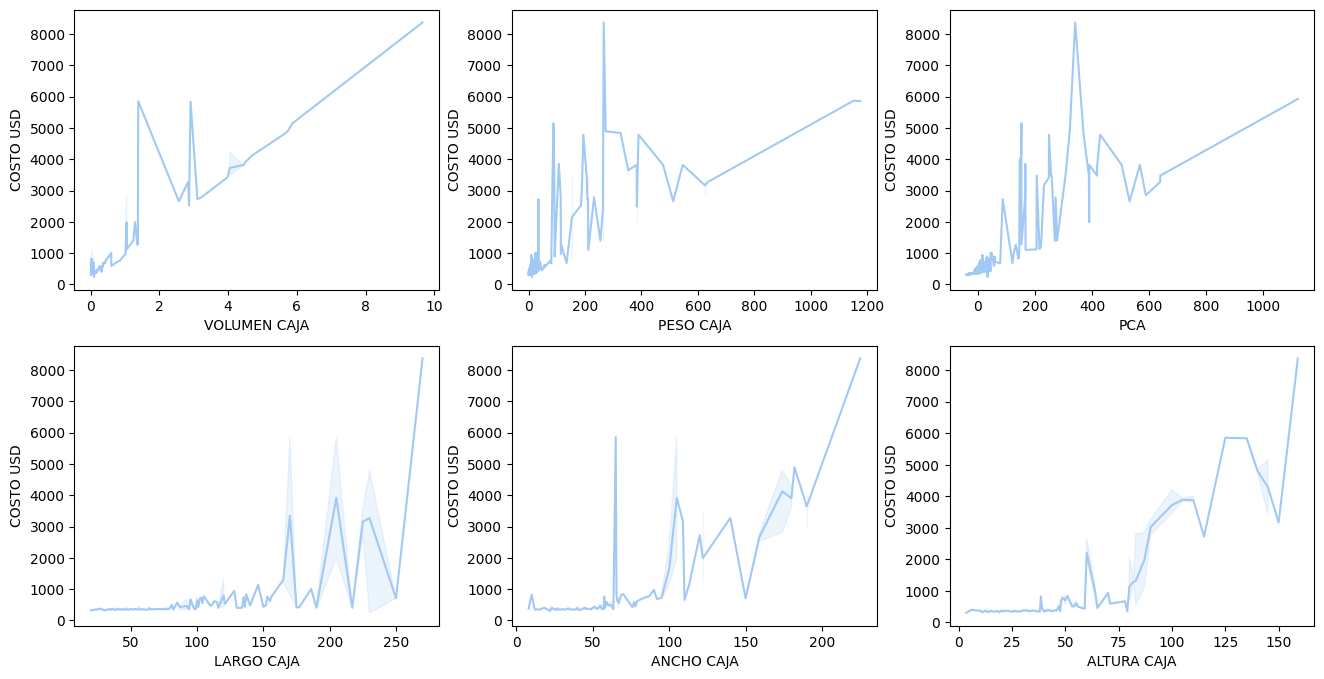

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
sns.lineplot(data=DSNX_9, x='VOLUMEN CAJA', y='COSTO USD', ax=axs[0,0])
sns.lineplot(data=DSNX_9, x='PESO CAJA', y='COSTO USD', ax=axs[0,1])
sns.lineplot(data=DSNX_9, x='PCA', y='COSTO USD', ax=axs[0,2])
sns.lineplot(data=DSNX_9, x='LARGO CAJA', y='COSTO USD', ax=axs[1,0])
sns.lineplot(data=DSNX_9, x='ANCHO CAJA', y='COSTO USD', ax=axs[1,1])
sns.lineplot(data=DSNX_9, x='ALTURA CAJA', y='COSTO USD', ax=axs[1,2])

Los gráficos son bastante contundentes en que, a mayor sea la medida, mayor será el costo.

Por supuesto esta tendencia lineal tiene excepciones, ya que las varibales por separado no logran explicar del todo el problema (por ejemplo, puede que una caja tenga poco ancho pero el costo sea elevado ya que justo pesa mucho).

En este sentido uno esperaría que PCA fuera el gráfico más recto, aunque sorprendentemente el volumen por si solo, explica mejor los datos que cualquier otra medida (con excepciones, por supuesto).

Veamos los días de viaje.

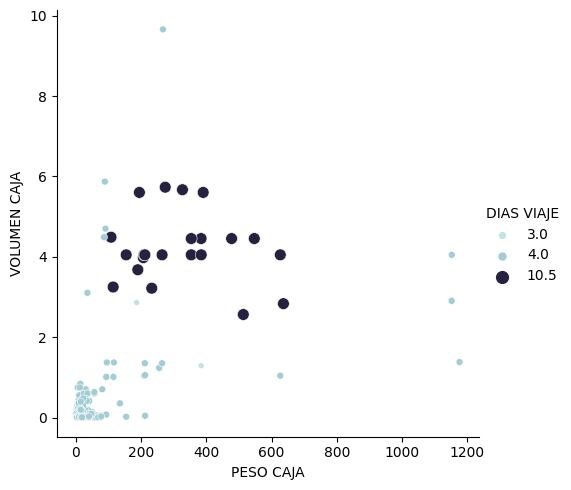

In [ ]:
sns.relplot(data=DSNX_9, x='PESO CAJA', y='VOLUMEN CAJA', hue='DIAS VIAJE', size='DIAS VIAJE', palette='ch:start=.2,rot=-.3')

En este caso vemos con claridad tres casos.

1) A poco volumen y peso, los días de viaje son 3-4.

2) A volumen y peso moderados, los días de viaje son 10.

3) A poco volumen y mucho peso (o viceversa), los días de viaje son 3-4.


##5.4 - Insights y conclusión

En esta sección del proyecto nos hemos encargado de analizar a fondo los costos involucrados en envíos internacionales de bultos. Este estudio nos permitió conocer de mejor manera qué variables se destacan a la hora del cálculo de los mismos, y así tener una mejor idea de qué atacar a la hora de querer reducirlos.

Como conclusiones podemos destacar:

1. Las distribuciones de volumen y peso (sin importar el tipo de caja) tienen una kurtosis muy alta.

2. El volumen y el peso permiten ver los tipos de caja agrupados en conjuntos bastante bien diferenciados, esto confirma que ambas variables son muy buenas para predecir el tipo de caja, como vimos en secciones anteriores.

3. La distancia de un destino a otro no es la variable definitiva a la hora de determinar los días de viaje que tendrá un bulto. Lo pudimos comprobar comparando lo que se demora en el trayecto China-Alemania vs China-EE.UU. De cierta forma tiene sentido, ya que probablemente el tráfico marítimo hacia EE.UU. sea mayor que el que va a Alemania (aumentando la frecuencia al enviarse más volumen).

4. El volumen del bulto aumenta más el costo de envío en comparación con lo que lo aumenta el peso. Es más, el volumen tiene casi una relación lineal con el costo.

5. En general el peso y volumen no afecta los días de viaje, solamente hay una influencia si el bulto es pesado y al mismo tiempo voluminoso, de lo contrario la cantidad de días se mantiene invariante.

